## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# INTRODUCTION

## Business Statements

## Data Source

### Column Names and descriptions for Kings County Data Set
* **id** - Unique identified for a house
* **date** - Date house was sold
* **price** - Price is prediction target
* **bedrooms** - Number of Bedrooms/House
* **bathrooms** - Number of bathrooms/bedrooms
* **sqft_living** - Square footage of the home
* **sqft_lot** - Square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - Square footage of house apart from basement
* **sqft_basement** - Square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - Zipcode
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - Square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - Square footage of the land lots of the nearest 15 neighbors

## Methodology

# DATA SCRUBBING

1. Casting columns to the appropriate data types
2. Identifying and dealing with null and duplicated values appropriately
3. Removing columns that aren't required for modeling
4. Checking for normality with distplot, qqplot
5. Checking for linearity with boxplot, correlation coefficient
6. Removing outliers that are more than 3 standard deviation away from the mean
7. Checking for and dealing with multicollinearity with heatmap
8. Select potential features for modeling
9. Normalizing the continuous
10. One hot encoding categorical data

## Data Overview

In [4611]:
#import all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

import scipy.stats as stats
plt.style.use('ggplot')

In [4612]:
#load dataset and view the first 5 rows
kc_house = pd.read_csv('./Data & Figures/kc_house_data.csv')
kc_house.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [4613]:
#get all column names
kc_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4614]:
#review number of rows and columns
kc_house.shape

(21597, 21)

There are 21597 samples and 21 features for each.

In [4615]:
#look at all columns together with their datatype
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Observation:**
* 'sqft_basement' datatye should be float
* 'date', 'yr_built', 'yr_renovated' should be in datetime object

## Deal with duplicates

In [4616]:
#check to see if 'id' is unique identifier for each sample
kc_house['id'].nunique()

21420

There are 21597 sample while 'id' has only 21420 counts, which means there are duplicates in the 'id' columns.

In [4617]:
#get sum of duplicates
kc_house['id'].duplicated().sum()

177

In [4618]:
#drop duplicates and only keep the most current data
kc_house = kc_house.sort_values('id', ascending = False).drop_duplicates(subset = 'id', keep = 'first')

In [4619]:
#check again
kc_house['id'].duplicated().sum()

0

In [4620]:
#recheck dataframe shape
kc_house.shape

(21420, 21)

In [4621]:
#drop the entire 'id' since we already dealt with its duplicates and we don't need it anymore
kc_house.drop('id', axis = 1, inplace = True)
kc_house.head(2)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15937  10/30/2014  268950.0         3       1.00         1320      8100   
20963    7/3/2014  399900.0         2       1.75         1410      1005   

       floors  waterfront  view  condition  grade  sqft_above sqft_basement  \
15937     1.0         0.0   0.0          3      6         880         440.0   
20963     1.5         0.0   0.0          3      9         900         510.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15937      1943           NaN    98166  47.4697 -122.351           1000   
20963      2011           0.0    98027  47.5446 -122.018           1440   

       sqft_lot15  
15937        8100  
20963        1188

## Deal with missing values

In [4622]:
#check for null values
kc_house.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2351
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3807
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

**'waterfront'**

In [4623]:
#check out 'waterfront'
print(kc_house['waterfront'].nunique())

kc_house['waterfront'].value_counts()

2


0.0    18923
1.0      146
Name: waterfront, dtype: int64

In [4624]:
#calculate how big a percentage of the missing values in 'waterfront' from the whole dataset is
((kc_house['waterfront'].isnull().sum()) / (len(kc_house)) * 100).round(2)

10.98

In [4625]:
#assuming that missing values in 'waterfront' is the absence of waterfront, we'll replace it with value of 0 since the majority of data falls under this value
kc_house['waterfront'] = kc_house['waterfront'].fillna(0)

#check again
kc_house['waterfront'].isnull().sum()

0

**'view'**

In [4626]:
#calculate how big a percentage of the missing values in 'view' from the whole dataset is
((kc_house['view'].isnull().sum()) / (len(kc_house)) * 100).round(2)

0.29

In [4627]:
#'view' is number of times a house is viewed with the majority of the house has not been viewed 
#this is not a feature we are interested in and it provides no useful information 
#drop 'view'
kc_house.drop('view', axis = 1, inplace = True)
kc_house.head(2)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15937  10/30/2014  268950.0         3       1.00         1320      8100   
20963    7/3/2014  399900.0         2       1.75         1410      1005   

       floors  waterfront  condition  grade  sqft_above sqft_basement  \
15937     1.0         0.0          3      6         880         440.0   
20963     1.5         0.0          3      9         900         510.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15937      1943           NaN    98166  47.4697 -122.351           1000   
20963      2011           0.0    98027  47.5446 -122.018           1440   

       sqft_lot15  
15937        8100  
20963        1188

**'yr_renovated'**

In [4628]:
#check out 'yr_renovated'
print(kc_house['yr_renovated'].nunique())

kc_house['yr_renovated'].value_counts()

70


0.0       16873
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1948.0        1
1976.0        1
1951.0        1
1971.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [4629]:
#calculate how big a percentage of the missing values in 'yr_renovated' from the whole dataset is
((kc_house['yr_renovated'].isnull().sum()) / (len(kc_house)) * 100).round(2)

17.77

In [4630]:
#take a look at the missing data
kc_house[kc_house['yr_renovated'].isnull()].head(5)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15937  10/30/2014  268950.0         3        1.0         1320      8100   
7614    6/24/2014  339000.0         3        1.0         1100      4128   
4675    6/26/2014  670000.0         3        1.5         1490      4400   
1714    5/14/2014  800000.0         3        1.0         1700      4400   
10382    1/7/2015  575000.0         4        2.0         1810      4400   

       floors  waterfront  condition  grade  sqft_above sqft_basement  \
15937     1.0         0.0          3      6         880         440.0   
7614      1.0         0.0          4      7         720         380.0   
4675      1.5         0.0          4      7        1490           0.0   
1714      1.5         0.0          4      8        1700           0.0   
10382     2.0         0.0          3      8        1700         110.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15937      1943           NaN    98166  47.4697 -122.351           1000   
7614       1942           NaN    98126  47.5296 -122.379           1510   
4675       1906           NaN    98122  47.6113 -122.292           1560   
1714       1906           NaN    98122  47.6120 -122.292           1610   
10382      1909           NaN    98122  47.6132 -122.292           1470   

       sqft_lot15  
15937        8100  
7614         4538  
4675         4400  
1714         4180  
10382        4400

In [4631]:
#calculate percentage of 'yr_renovated' == 0.0
((len(kc_house[kc_house['yr_renovated'] == 0.0]) / len(kc_house)) * 100)

78.77217553688142

In [4632]:
#since the majority of 'yr_renovated' is 0.0, replace NaN with 0
kc_house['yr_renovated'] = kc_house['yr_renovated'].fillna(0)

#check again
kc_house['yr_renovated'].isnull().sum()

0

### Correct datatypes

**'sqft_basement'**

In [4633]:
#check out the 'sqft_basement' feature
kc_house['sqft_basement'].sort_values(ascending = True)

2495     0.0
5809     0.0
7739     0.0
19408    0.0
12796    0.0
        ... 
9442       ?
5765       ?
17113      ?
1476       ?
6325       ?
Name: sqft_basement, Length: 21420, dtype: object

We see that the '?' prevents us from correcting 'sqft_basement' to 'float64'. We need to fix this first.

In [4634]:
len(kc_house[kc_house['sqft_basement'] == '?'])

452

In [4635]:
#calculate 'sqft_basement' = 'sqft_living' - 'sqft_above'
for i in list(kc_house[kc_house['sqft_basement'] == '?'].index.values): 
    kc_house.loc[i, 'sqft_basement'] = kc_house.loc[i, 'sqft_living'] - kc_house.loc[i, 'sqft_above']

In [4636]:
#check again
kc_house[kc_house['sqft_basement'] == '?']

Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

In [4637]:
#correct 'sqft_basement' to float
kc_house['sqft_basement'] = kc_house['sqft_basement'].astype('float64')

#check
kc_house['sqft_basement'].dtypes

dtype('float64')

**'date'**

In [4638]:
#check to see if 'date' is a datetime object
import datetime

isinstance(kc_house['date'][0], datetime.date)

False

In [4639]:
#convert 'date' to a datetime object
kc_house['date'] = pd.to_datetime(kc_house['date'])

#check again
isinstance(kc_house['date'][0], datetime.date)

True

# DATA EXPLORATION

Once we've the cleaned data, we do some further EDA to check out the distributions of the various columns, examine the descriptive statistics for the dataset, and to create some initial visualizations to better understand the dataset.

* Visualizing Distributions - histplot with KDE
* Visualizing Linearity - Boxplot of feature vs. 'price'
* Visualizing Linearity - LMplot to see regression line vs. data distribution 

In [4640]:
#get data summary statistics
kc_house.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.142000e+04  21420.000000  21420.000000  21420.000000  2.142000e+04   
mean   5.412725e+05      3.373950      2.118429   2083.132633  1.512804e+04   
std    3.677194e+05      0.925405      0.768720    918.808412  4.153080e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.237250e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1920.000000  7.614000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.069050e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront     condition         grade    sqft_above  \
count  21420.000000  21420.000000  21420.000000  21420.000000  21420.000000   
mean       1.495985      0.006816      3.410784      7.662792   1791.170215   
std        0.540081      0.082280      0.650035      1.171971    828.692965   
min        1.000000      0.000000      1.000000      3.000000    370.000000   
25%        1.000000      0.000000      3.000000      7.000000   1200.000000   
50%        1.500000      0.000000      3.000000      7.000000   1560.000000   
75%        2.000000      0.000000      4.000000      8.000000   2220.000000   
max        3.500000      1.000000      5.000000     13.000000   9410.000000   

       sqft_basement      yr_built  yr_renovated      zipcode           lat  \
count   21420.000000  21420.000000  21420.000000  21420.00000  21420.000000   
mean      291.962418   1971.092997     68.956723  98077.87437     47.560197   
std       442.875502     29.387141    364.552298     53.47748      0.138589   
min         0.000000   1900.000000      0.000000  98001.00000     47.155900   
25%         0.000000   1952.000000      0.000000  98033.00000     47.471200   
50%         0.000000   1975.000000      0.000000  98065.00000     47.572100   
75%       560.000000   1997.000000      0.000000  98117.00000     47.678100   
max      4820.000000   2015.000000   2015.000000  98199.00000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21420.000000   21420.000000   21420.000000  
mean    -122.213784    1988.384080   12775.718161  
std        0.140791     685.537057   27345.621867  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.230000    1840.000000    7620.000000  
75%     -122.125000    2370.000000   10086.250000  
max     -121.315000    6210.000000  871200.000000

## Initial Observation of Data

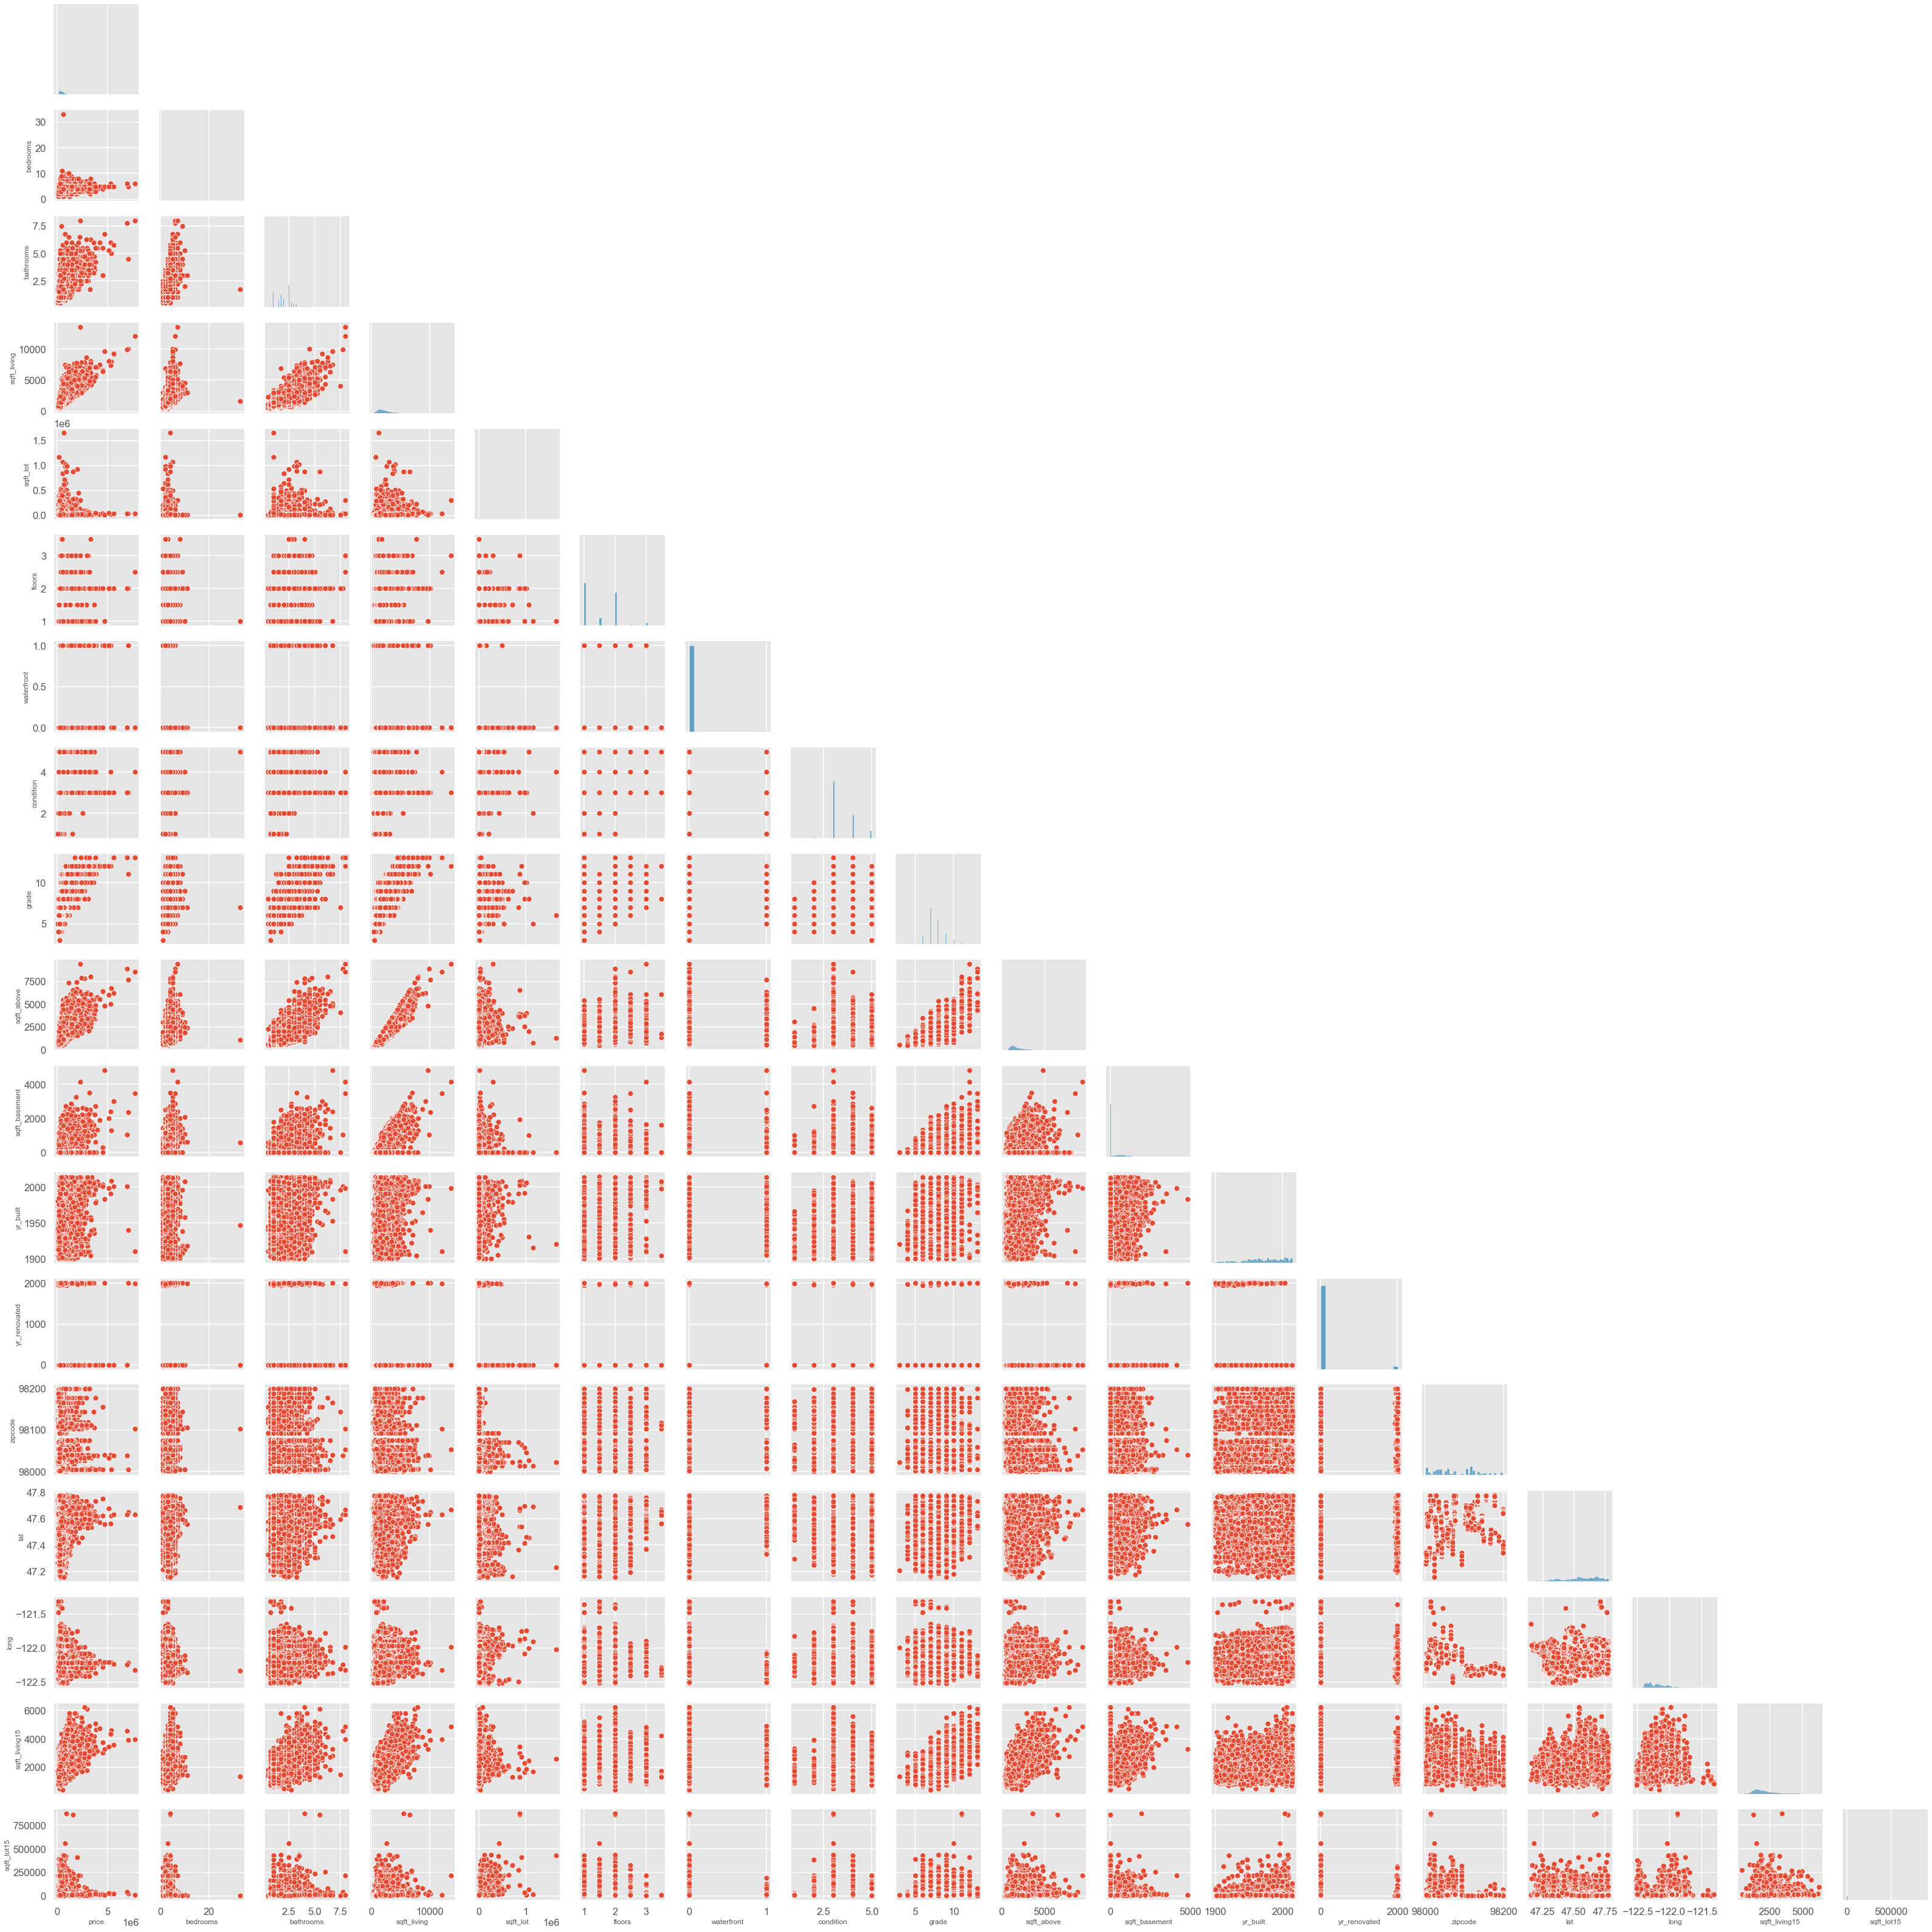

In [4641]:
#quickly scan for linearity
sns.pairplot(kc_house, diag_kind = 'hist', corner = True)

In [4642]:
#save
plt.savefig('./Data & Figures/all_pairplot')

<Figure size 432x288 with 0 Axes>

**Observation:** Quick scan for linearity
* 'sqft_living' vs. 'price', 'sqft_living' vs. 'bathrooms', 'sqft_living' vs. 'sqft_above', 'sqft_living' vs. 'sqft_living15'
* 'sqft_above' vs. 'grade'
* 'sqft_living15' vs. 'grade', 'sqft_living15' vs. 'sqft_above'
* 'price' vs. 'bedrooms', 'price' vs. 'bathrooms', 'price' vs. 'grade', 'price' vs. 'sqft_above', 'price' vs. 'sqft_living15'

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

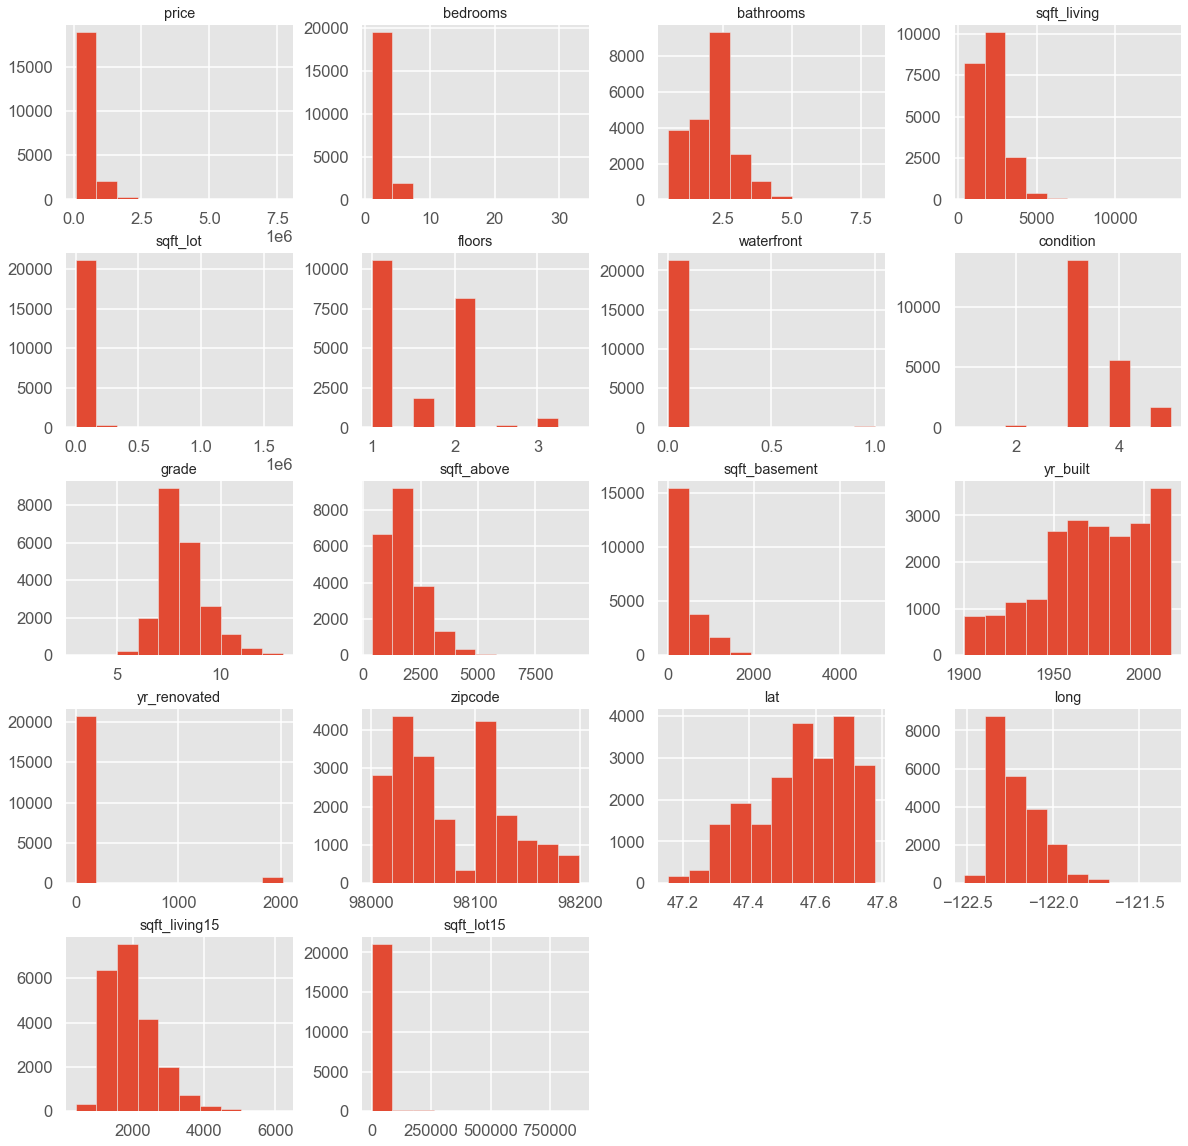

In [4643]:
#quick scan for normality and inflated '0'
kc_house.hist(figsize = (20, 20))

In [4644]:
#save
plt.savefig('./Data & Figures/all_histplot')

<Figure size 432x288 with 0 Axes>

In [4645]:
#split data into 2 groups of type continous and type categoricals and see how they behave with respect to 'price'
continuous = ['price', 'sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
categoricals = ['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade']

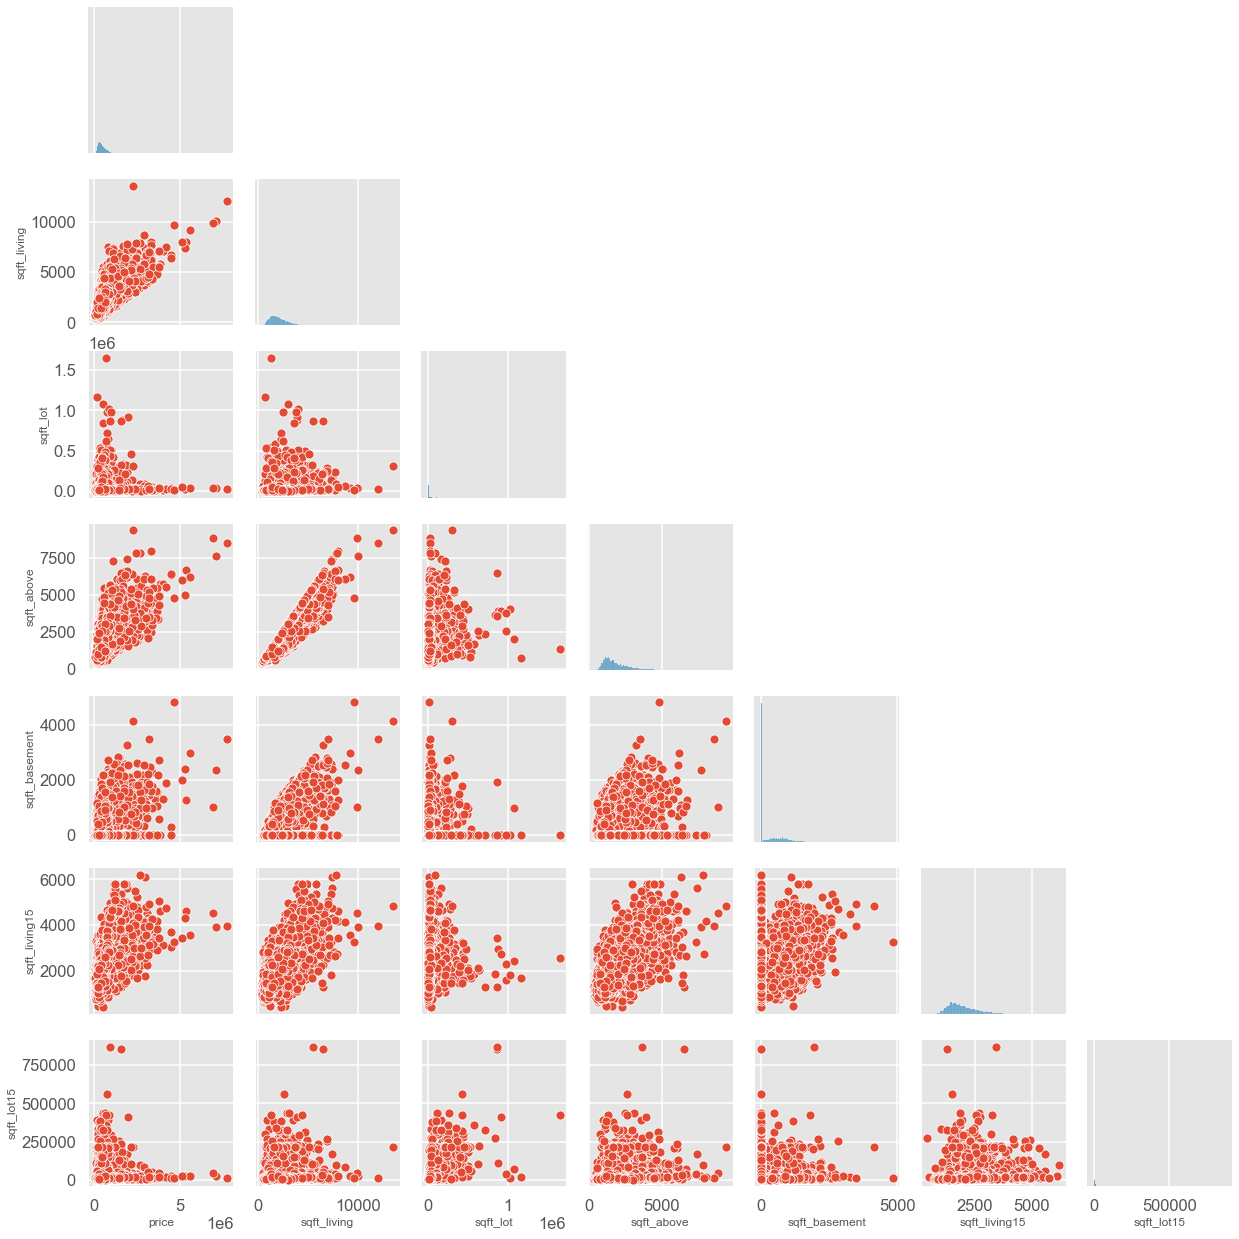

In [4646]:
#take a closer look at continuous data
sns.pairplot(kc_house[continuous], diag_kind = 'hist', corner = True)

In [4647]:
#save
plt.savefig('./Data & Figures/continuous_pairplot')

<Figure size 432x288 with 0 Axes>

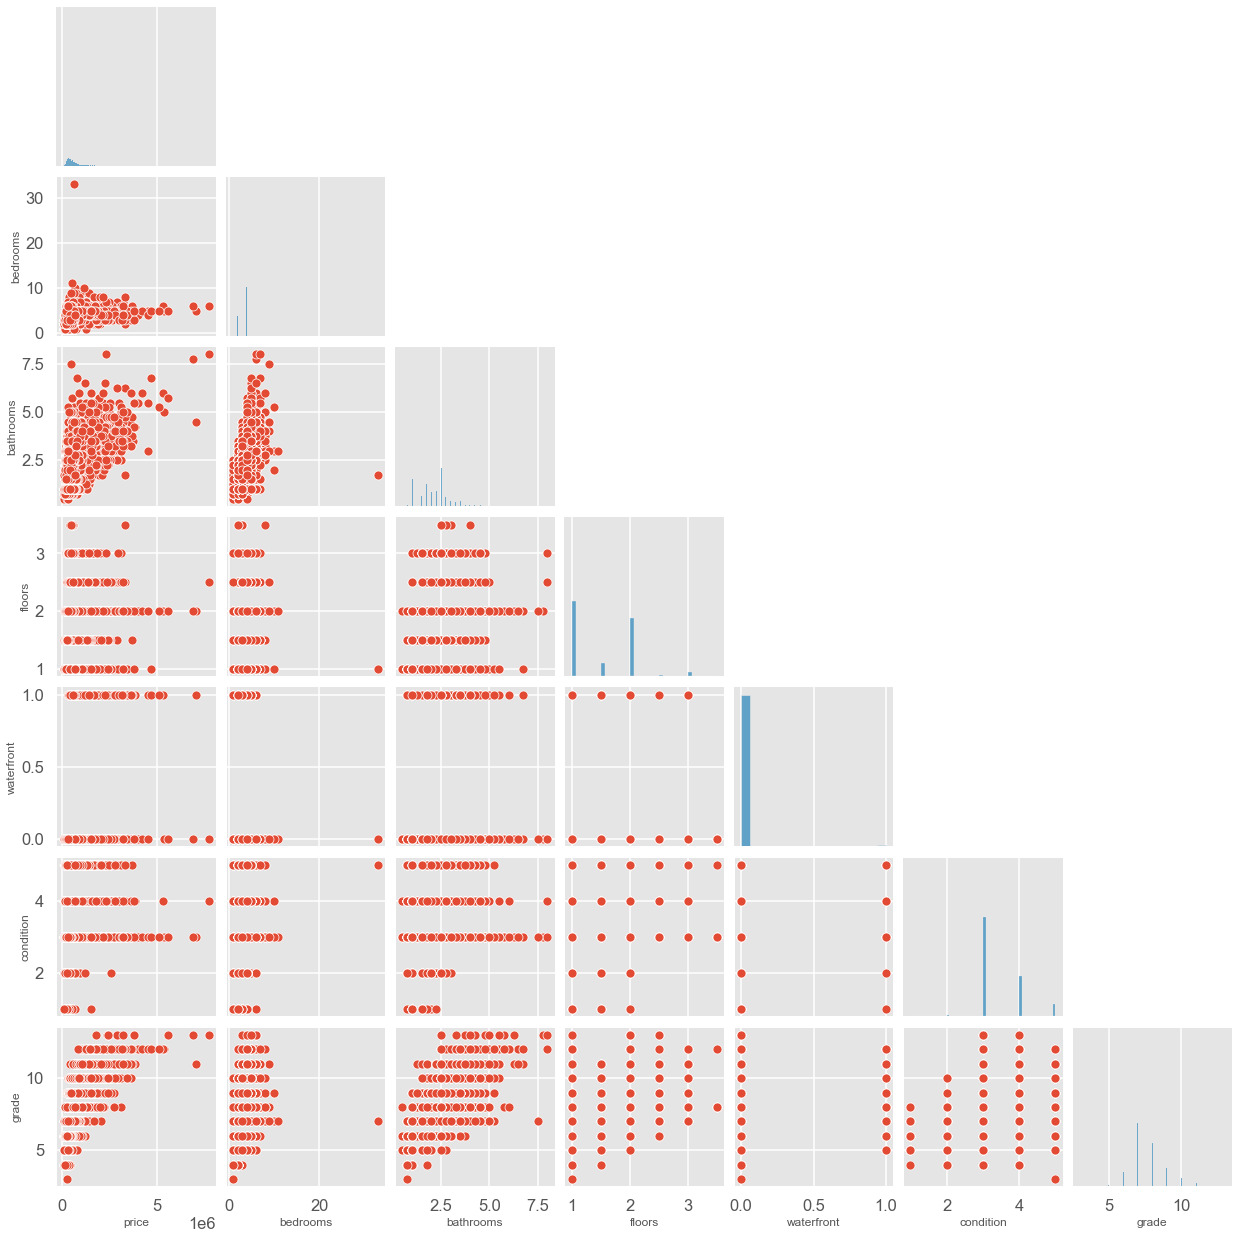

In [4648]:
#take a closer look at categoricals data
sns.pairplot(kc_house[categoricals], diag_kind = 'hist', corner = True)

In [4649]:
#save
plt.savefig('./Data & Figures/categoricals_pairplot')

<Figure size 432x288 with 0 Axes>

We see that 'bedrooms', 'bathrooms', and 'grade' have somewhat of a linearity with respect to 'price.' We will look at them again later to determine if they belong to continous data group or categorical data group.

## In-Depth Look into Each Feature

For this section, we will look for linearity of a feature with respect to targe variable 'price'. 

We will also look for skewness and kurtosis in our data distribution and perform data transformation and/or removal of outliers when needed. Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails.

* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
* If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
* If the skewness is less than -1 or greater than 1, the data are highly skewed

Kurtosis is one of the two measures that quantify shape of a distribution. Kutosis determine the volume of the outlier. Kurtosis describes the peakedness of the distribution.

* If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3). Values in a leptokurtic distribution are near the mean or at the extremes.
* A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic(Kurtosis <3) distribution.
* A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic(Kurtosis=3) distribution. A mesokurtic distribution looks more close to a normal distribution.
* High kurtosis in a data set is an indicator that data has heavy outliers.
* Low kurtosis in a data set is an indicator that data has lack of outliers.
* If kurtosis value + means pointy and — means flat.

Pearson correlation will be calculated to get correlation between a feature and the target variable 'price'
* A value = 0 implies no correlation
* A value closer to 0 implies weaker correlation
* A value closer to 1 implies stronger positive correlation
* A value closer to -1 implies stronger negative correlation.

## Target Variable

### Price: 'price'

In [4650]:
#look at summary statistics & remove scientific notation
kc_house['price'].describe().apply(lambda x: format(x, 'f'))

count      21420.000000
mean      541272.456956
std       367719.436952
min        78000.000000
25%       323725.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object

In [4652]:
#get skewness
print('Skewness:', kc_house['price'].skew()) #data is highly skewed right

#get kurtosis
print('Kurtosis:', kc_house['price'].kurtosis()) #data is leptokurtic, data has heavy outliers

Skewness: 4.032580846599345
Kurtosis: 34.63813795020617


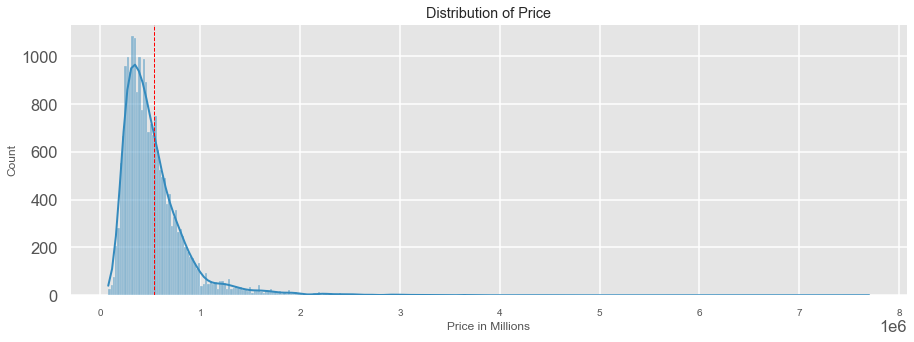

<Figure size 432x288 with 0 Axes>

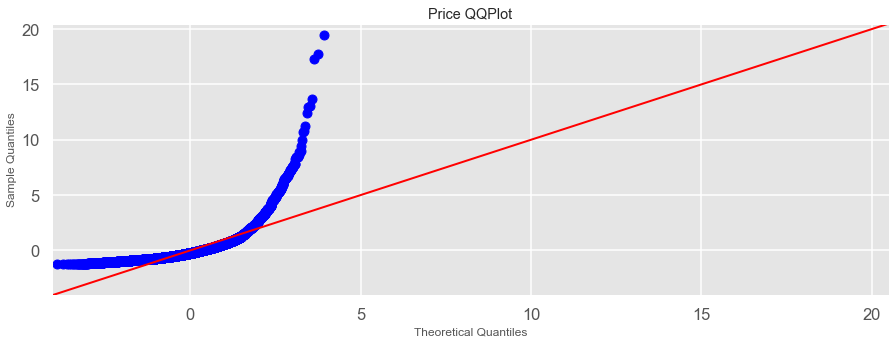

In [4655]:
#plot 'price'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['price'], kde = True)
plt.title('Distribution of Price')
plt.xlabel('Price in Millions')
plt.axvline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/price_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['price'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Price QQPlot')
plt.savefig('./Data & Figures/price_qqplot')

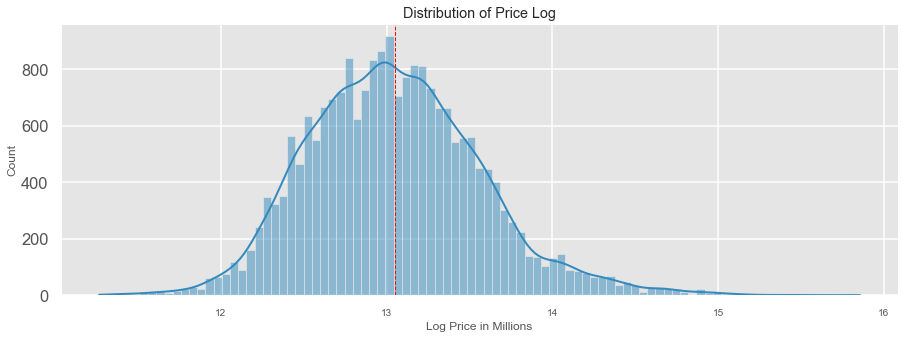

<Figure size 432x288 with 0 Axes>

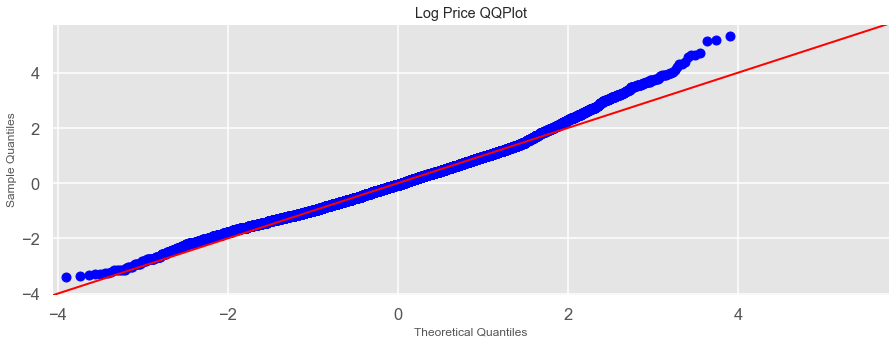

In [4667]:
#applying log transformation
kc_house['price_log'] = np.log(kc_house['price'])

#re-plot 'price'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['price_log'], kde = True)
plt.title('Distribution of Price Log')
plt.xlabel('Log Price in Millions')
plt.axvline(kc_house['price_log'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/price_log_distribution_histplot')

#re-check for normality
fig = sm.graphics.qqplot(kc_house['price_log'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Log Price QQPlot')
plt.savefig('./Data & Figures/price_log_qqplot')

In [4657]:
#get skewness
print('Skewness:', kc_house['price_log'].skew()) #data is fairly symmetrical

#get kurtosis
print('Kurtosis:', kc_house['price_log'].kurtosis()) #data is platykurtic and moderately spread out 

Skewness: 0.44303600060571435
Kurtosis: 0.6933408095717946


## Check for Linearity with Target Variable 'price'

## Continuous Variables

### Square footage of the home: 'sqft_living'

In [4658]:
#look at summary statistics & remove scientific notation
kc_house['sqft_living'].describe().apply(lambda x: format(x, 'f'))

count    21420.000000
mean      2083.132633
std        918.808412
min        370.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: object

In [4659]:
#get skewness
print('Skewness:', kc_house['sqft_living'].skew()) #data is highly skewed right

#get kurtosis
print('Kurtosis:', kc_house['sqft_living'].kurtosis()) #data is leptokurtic, data has heavy outliers

Skewness: 1.4727019951483347
Kurtosis: 5.258187001259873


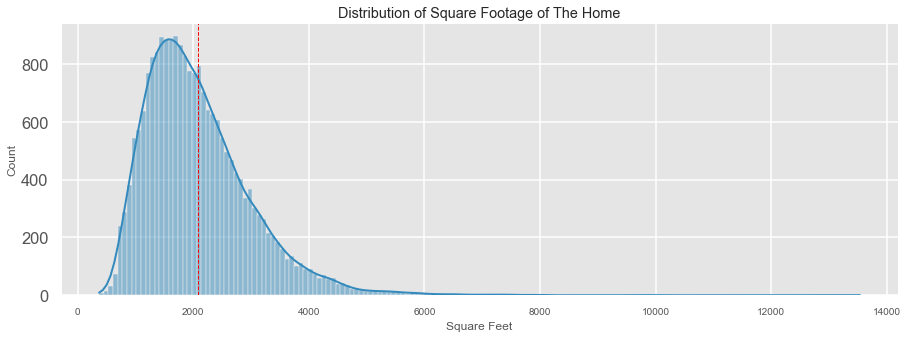

<Figure size 432x288 with 0 Axes>

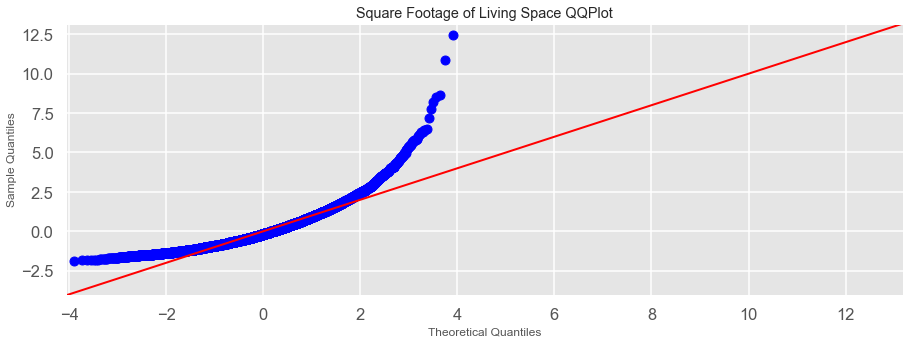

In [4661]:
#plot 'sqft_living'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['sqft_living'], kde = True)
plt.title('Distribution of Square Footage of The Home')
plt.xlabel('Square Feet')
plt.axvline(kc_house['sqft_living'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_living_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_living'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Square Footage of Living Space QQPlot')
plt.savefig('./Data & Figures/sqft_living_qqtplot')

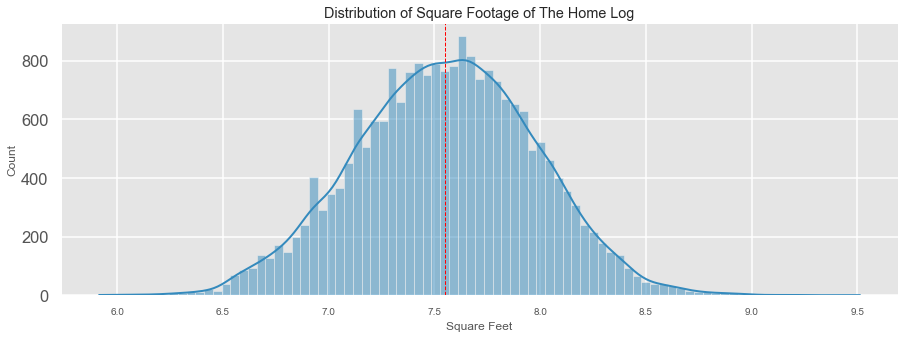

<Figure size 432x288 with 0 Axes>

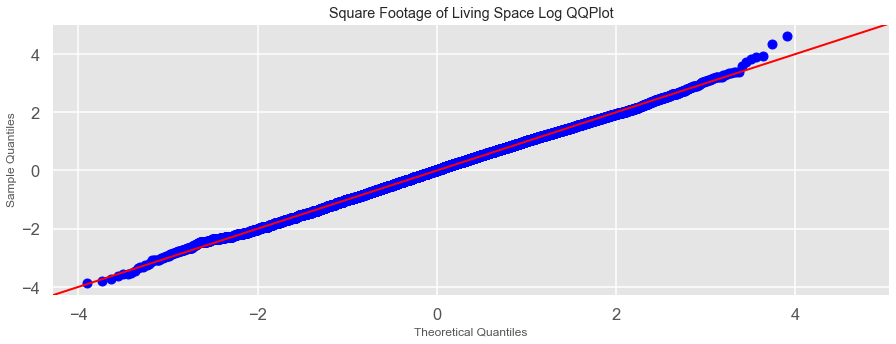

In [4662]:
#applying log transformation
kc_house['sqft_living_log'] = np.log(kc_house['sqft_living'])

#re-plot 'price_log'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['sqft_living_log'], kde = True)
plt.title('Log Distribution of Square Footage of The Home')
plt.xlabel('Log Square Feet')
plt.axvline(kc_house['sqft_living_log'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_living_log_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_living_log'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Log Square Footage of Living Space QQPlot')
plt.savefig('./Data & Figures/sqft_living_log_qqtplot')

In [4663]:
#get skewness
print('Skewness:', kc_house['sqft_living_log'].skew()) #data is fairly symmetrical

#get kurtosis
print('Kurtosis:', kc_house['sqft_living_log'].kurtosis()) #data is platykurtic and moderately spread out

Skewness: -0.028908796802070477
Kurtosis: -0.07688511785009045


<Figure size 1080x360 with 0 Axes>

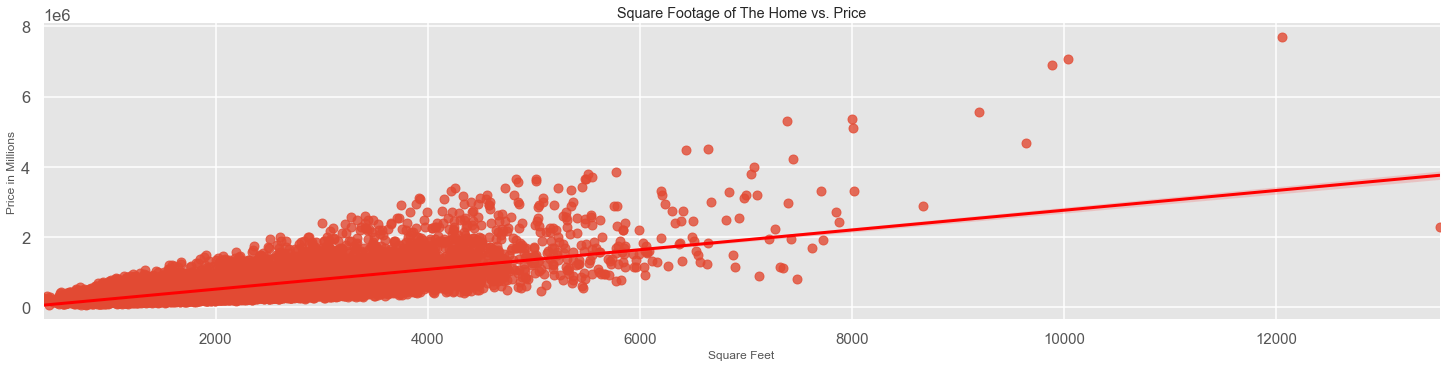

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

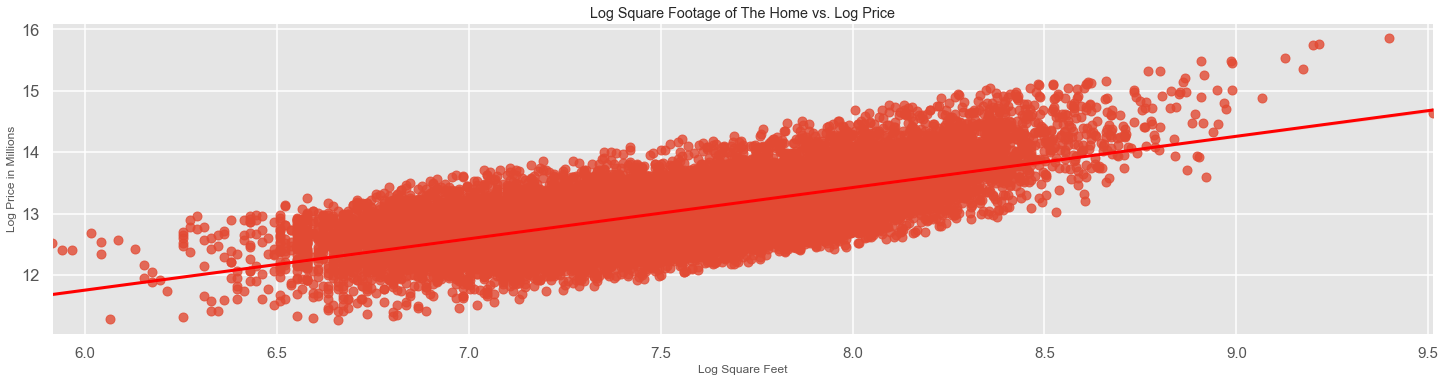

<Figure size 432x288 with 0 Axes>

In [4668]:
#plot 'price' vs. sqft_living'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_living',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'red'})
plt.title('Square Footage of The Home vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/sqft_living_vs_price_lmplot')

#plot 'price_log' vs. sqft_living_log'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_living_log',
           y = 'price_log',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'red'})
plt.title('Log Square Footage of The Home vs. Log Price')
plt.xlabel('Log Square Feet')
plt.ylabel('Log Price in Millions')
plt.xticks(fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/sqft_living_log_vs_price_log_lmplot')

In [4676]:
#get correlation
kc_house[['sqft_living', 'sqft_living_log', 'price']].corr()

sqft_living  sqft_living_log     price
sqft_living         1.000000         0.954597  0.701651
sqft_living_log     0.954597         1.000000  0.611413
price               0.701651         0.611413  1.000000

### Square footage of the lot: 'sqft_lot'

In [4381]:
#look at summary statistics & remove scientific notation
kc_house['sqft_lot'].describe().apply(lambda x: format(x, 'f'))

count      21420.000000
mean       15128.038002
std        41530.796838
min          520.000000
25%         5040.000000
50%         7614.000000
75%        10690.500000
max      1651359.000000
Name: sqft_lot, dtype: object

In [4670]:
#get skewness
print('Skewness:', kc_house['sqft_lot'].skew()) #data is extremely skewed right

#get kurtosis
print('Kurtosis:', kc_house['sqft_lot'].kurtosis()) #data is leptokurtic and has heavy outliers

Skewness: 13.056251852883625
Kurtosis: 284.49987477810924


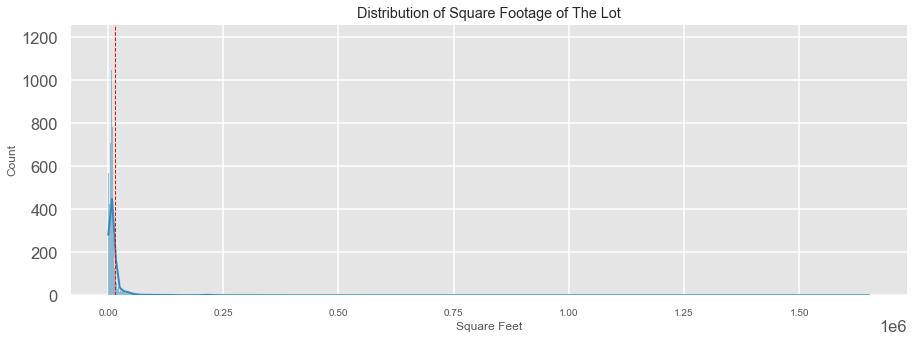

<Figure size 432x288 with 0 Axes>

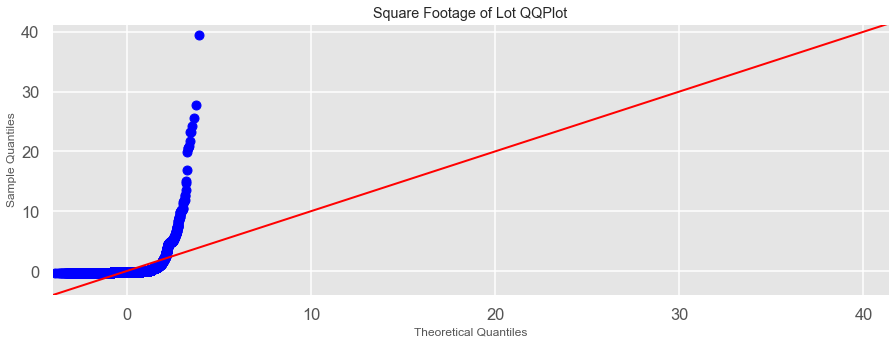

In [4671]:
#plot 'sqft_lot'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['sqft_lot'], kde = True)
plt.title('Distribution of Square Footage of The Lot')
plt.xlabel('Square Feet')
plt.axvline(kc_house['sqft_lot'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_lot_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_lot'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Square Footage of Lot QQPlot')
plt.savefig('./Data & Figures/sqft_lot_qqplot')

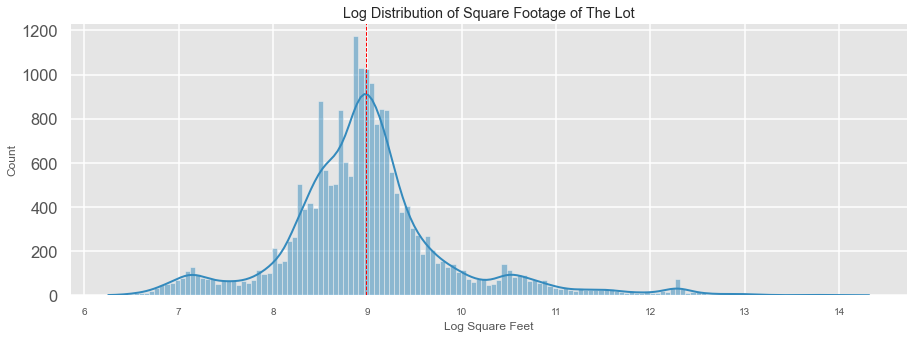

<Figure size 432x288 with 0 Axes>

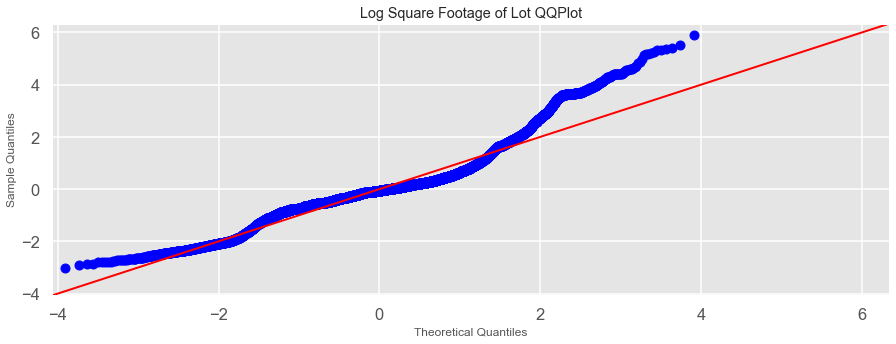

In [4672]:
#applying log transformation
kc_house['sqft_lot_log'] = np.log(kc_house['sqft_lot'])

#plot 'sqft_lot_log'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['sqft_lot_log'], kde = True)
plt.title('Log Distribution of Square Footage of The Lot')
plt.xlabel('Log Square Feet')
plt.axvline(kc_house['sqft_lot_log'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_lot_log_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_lot_log'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Log Square Footage of Lot QQPlot')
plt.savefig('./Data & Figures/sqft_lot__log_qqplot')

In [4673]:
#get skewness
print('Skewness:', kc_house['sqft_lot_log'].skew()) #data is heavily skewed right

#get kurtosis
print('Kurtosis:', kc_house['sqft_lot_log'].kurtosis()) #data is leptokurtic and has heavy outliers

Skewness: 0.9603150668809269
Kurtosis: 3.3102493636413968


<Figure size 1080x360 with 0 Axes>

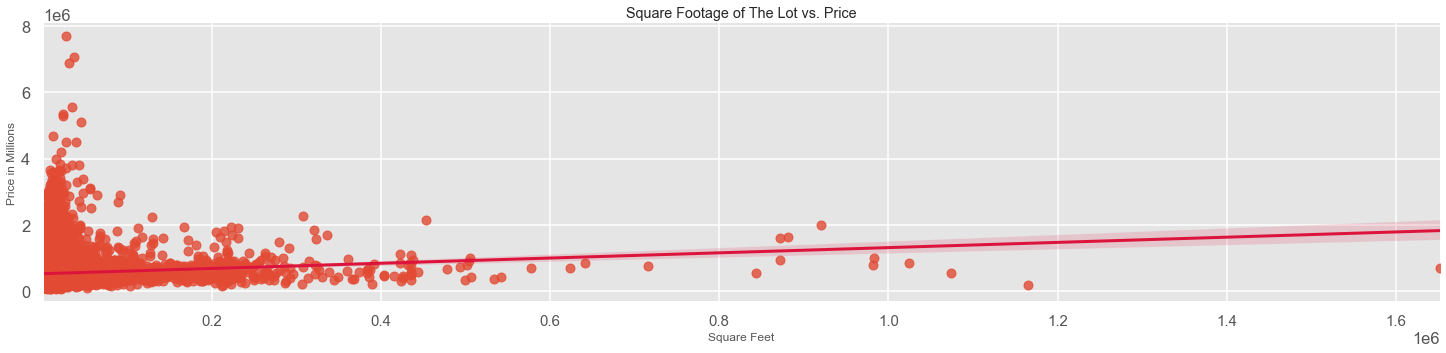

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

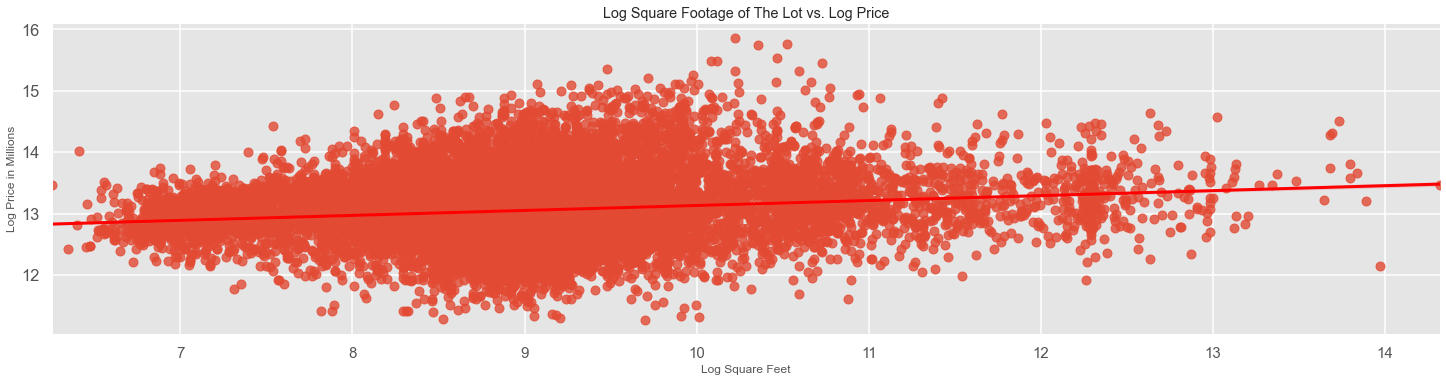

<Figure size 432x288 with 0 Axes>

In [4674]:
#plot 'price' vs. sqft_lot'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_lot',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})
plt.title('Square Footage of The Lot vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/sqft_lot_vs_price_lmplot')

#plot 'price_log' vs. sqft_lot_log'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_lot_log',
           y = 'price_log',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'red'})
plt.title('Log Square Footage of The Lot vs. Log Price')
plt.xlabel('Log Square Feet')
plt.ylabel('Log Price in Millions')
plt.xticks(fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/sqft_lot_vs_price_log_lmplot')

In [4675]:
kc_house[['sqft_lot', 'sqft_lot_log', 'price']].corr()

sqft_lot  sqft_lot_log     price
sqft_lot      1.000000      0.638385  0.088936
sqft_lot_log  0.638385      1.000000  0.161567
price         0.088936      0.161567  1.000000

'sqft_lot' has very low correlation with 'price' hence we will not be using this feature.

### Square footage of house apart from basement: 'sqft_above'

In [4392]:
#look at summary statistics & remove scientific notation
kc_house['sqft_above'].describe().apply(lambda x: format(x, 'f'))

count    21420.000000
mean      1791.170215
std        828.692965
min        370.000000
25%       1200.000000
50%       1560.000000
75%       2220.000000
max       9410.000000
Name: sqft_above, dtype: object

In [4677]:
#get skewness
print('Skewness:', kc_house['sqft_above'].skew()) #data is heavily skewed right

#get kurtosis
print('Kurtosis:', kc_house['sqft_above'].kurtosis()) #data is leptokurtic and has heavy outliers

Skewness: 1.4450007970330156
Kurtosis: 3.398336397421044


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


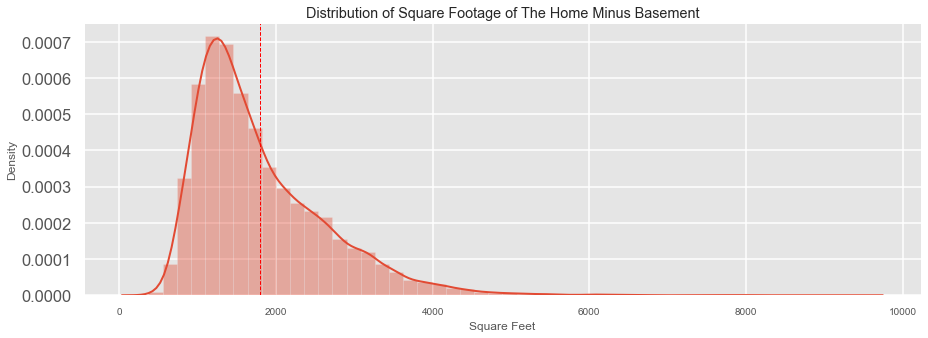

<Figure size 432x288 with 0 Axes>

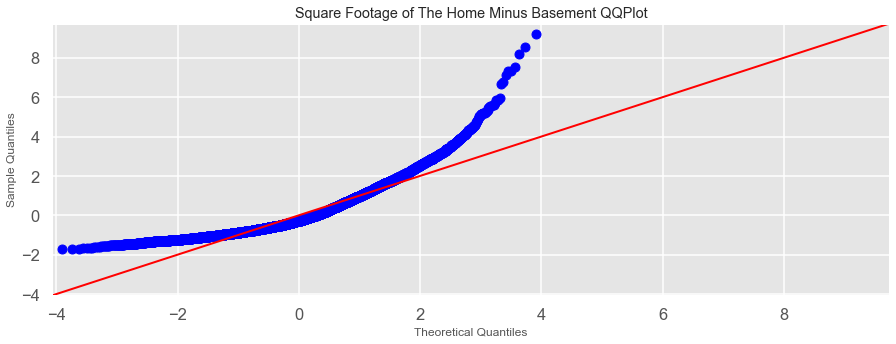

In [4678]:
#plot 'sqft_above'
plt.figure(figsize = (15, 5))
sns.distplot(kc_house['sqft_above'], kde = True)
plt.title('Distribution of Square Footage of The Home Minus Basement')
plt.xlabel('Square Feet')
plt.axvline(kc_house['sqft_above'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_above_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_above'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Square Footage of The Home Minus Basement QQPlot')
plt.savefig('./Data & Figures/sqft_above_qqplot')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


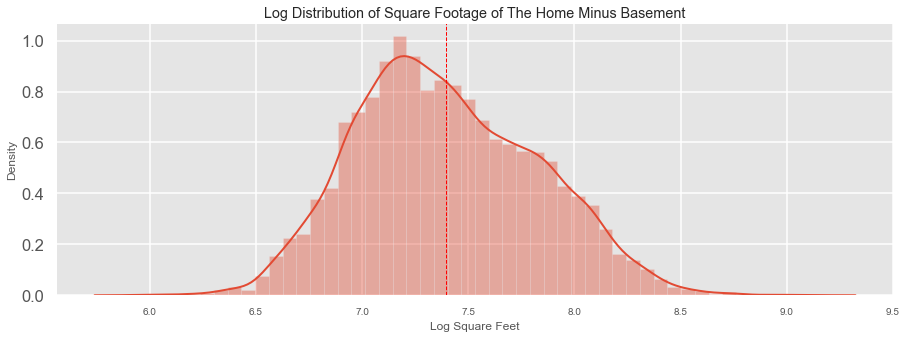

<Figure size 432x288 with 0 Axes>

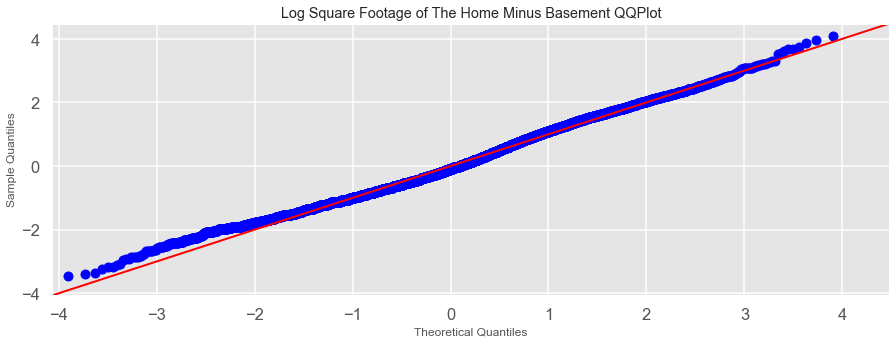

In [4679]:
#applying log transformation
kc_house['sqft_above_log'] = np.log(kc_house['sqft_above'])

#plot 'sqft_above_log'
plt.figure(figsize = (15, 5))
sns.distplot(kc_house['sqft_above_log'], kde = True)
plt.title('Log Distribution of Square Footage of The Home Minus Basement')
plt.xlabel('Log Square Feet')
plt.axvline(kc_house['sqft_above_log'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_above_log_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_above_log'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Log Square Footage of The Home Minus Basement QQPlot')
plt.savefig('./Data & Figures/sqft_above_log_qqplot')

In [4680]:
#get skewness
print('Skewness:', kc_house['sqft_above_log'].skew()) #data is fairly symmetrical

#get kurtosis
print('Kurtosis:', kc_house['sqft_above_log'].kurtosis()) #data is mesokurtic and has little outliers

Skewness: 0.2568298510957252
Kurtosis: -0.33456267538943996


<Figure size 1080x360 with 0 Axes>

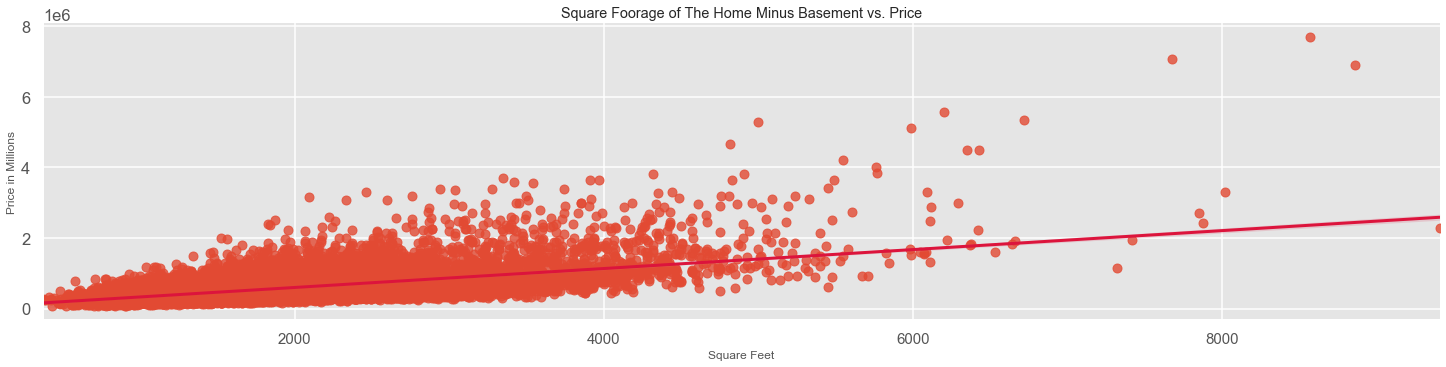

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

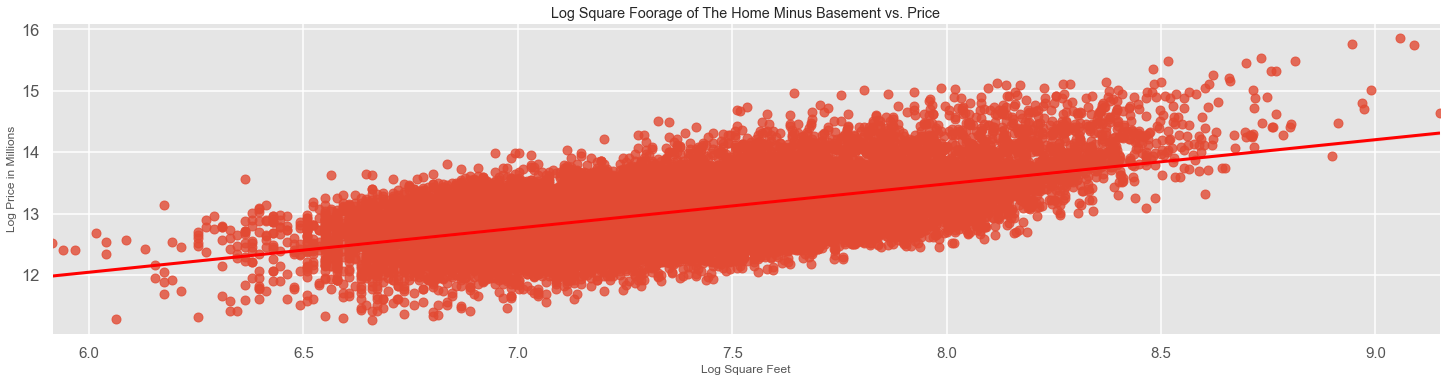

<Figure size 432x288 with 0 Axes>

In [4681]:
#plot 'price' vs. sqft_above'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_above',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})
plt.title('Square Foorage of The Home Minus Basement vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/sqft_above_vs_price_lmplot')

#plot 'price_log' vs. sqft_above_log'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_above_log',
           y = 'price_log',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'red'})
plt.title('Log Square Foorage of The Home Minus Basement vs. Price')
plt.xlabel('Log Square Feet')
plt.ylabel('Log Price in Millions')
plt.xticks(fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/sqft_above_log_vs_price_log_lmplot')

In [4682]:
kc_house[['sqft_above', 'sqft_above_log', 'price']].corr()

sqft_above  sqft_above_log     price
sqft_above        1.000000        0.962524  0.604916
sqft_above_log    0.962524        1.000000  0.542012
price             0.604916        0.542012  1.000000

### Square footage of basement: 'sqft_basement'

In [4403]:
#look at summary statistics & remove scientific notation
kc_house['sqft_basement'].describe().apply(lambda x: format(x, 'f'))

count    21420.000000
mean       291.962418
std        442.875502
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: object

In [4683]:
#get skewness
print('Skewness:', kc_house['sqft_basement'].skew()) #data is moderately skewed right

#get kurtosis
print('Kurtosis:', kc_house['sqft_basement'].kurtosis()) #data is platykurtic and has little outliers

Skewness: 1.5757888858145297
Kurtosis: 2.708184540482314


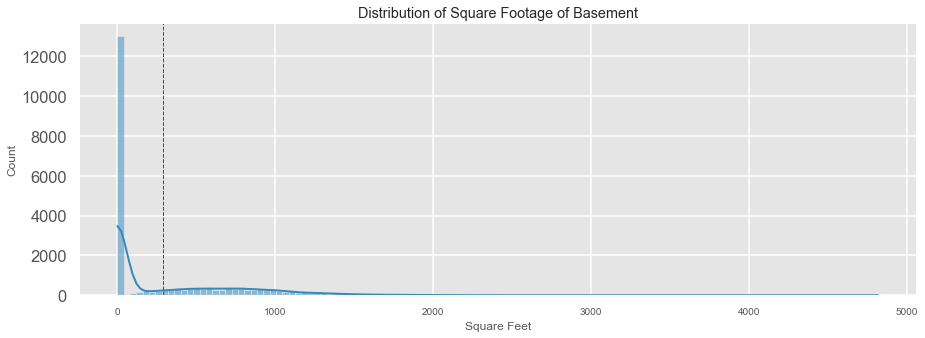

<Figure size 432x288 with 0 Axes>

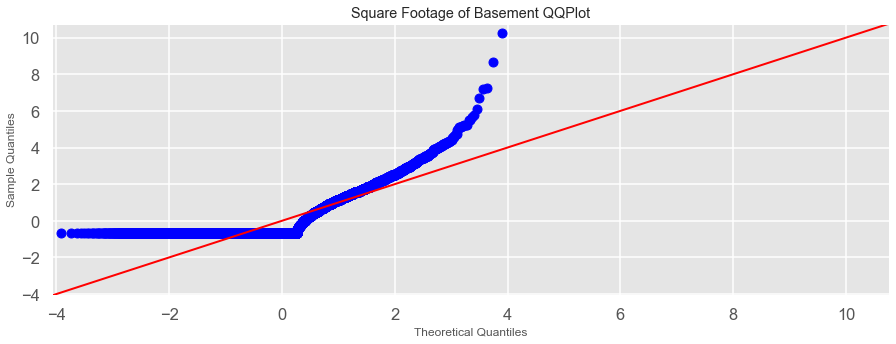

In [4684]:
#plot 'sqft_basement'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['sqft_basement'], kde = True)
plt.title('Distribution of Square Footage of Basement')
plt.xlabel('Square Feet')
plt.axvline(kc_house['sqft_basement'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_basement_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_basement'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Square Footage of Basement QQPlot')
plt.savefig('./Data & Figures/sqft_basement_qqplot')

There are inflated value of 0 since many houses have no basement. Zero-inflated variable is cumbersome to work with so we will classify 'sqft_basement' as dichotomous variable.

In [4685]:
#classify 'sqft_basement' as dichotomous variable and will treat this as categorical variable
kc_house['basement'] = kc_house['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

#view
kc_house.head(2)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15937 2014-10-30  268950.0         3       1.00         1320      8100   
20963 2014-07-03  399900.0         2       1.75         1410      1005   

       floors  waterfront  condition  grade  ...  zipcode      lat     long  \
15937     1.0         0.0          3      6  ...    98166  47.4697 -122.351   
20963     1.5         0.0          3      9  ...    98027  47.5446 -122.018   

       sqft_living15  sqft_lot15  price_log  sqft_living_log  sqft_lot_log  \
15937           1000        8100  12.502281         7.185387      8.999619   
20963           1440        1188  12.898970         7.251345      6.912743   

       sqft_above_log  basement  
15937        6.779922         1  
20963        6.802395         1  

[2 rows x 24 columns]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


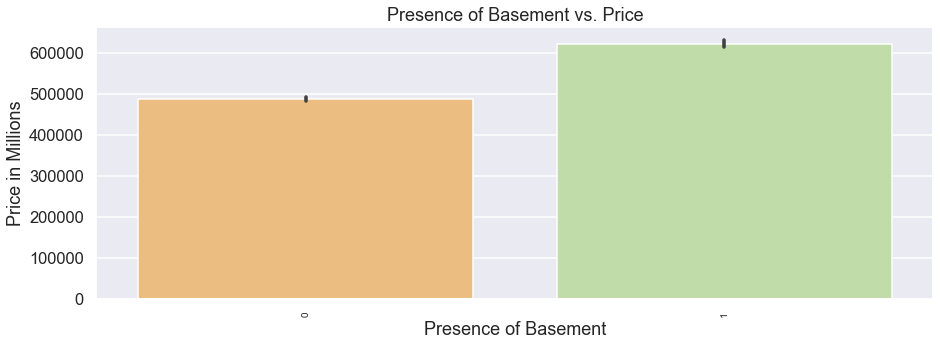

In [4412]:
#plot 'basement' vs. 'price'  distribution
plt.figure(figsize = (15, 5))
sns.barplot(kc_house['basement'], kc_house['price'], 
            palette = "Spectral")

#set labels
plt.title('Presence of Basement vs. Price')
plt.xlabel('Presence of Basement')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 10, rotation = 90)

#show
plt.show()

#save
plt.savefig('./Data & Figures/basement_vs_price_barplot')

In [4413]:
#get correlation
kc_house[['sqft_basement', 'price']].corr()

sqft_basement     price
sqft_basement       1.000000  0.323777
price               0.323777  1.000000

### Square footage of interior housing living space for the nearest 15 neighbors: 'sqft_living15'

In [4414]:
#look at summary statistics & remove scientific notation
kc_house['sqft_living15'].describe().apply(lambda x: format(x, 'f'))

count    21420.000000
mean      1988.384080
std        685.537057
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2370.000000
max       6210.000000
Name: sqft_living15, dtype: object

In [4686]:
#get skewness
print('Skewness:', kc_house['sqft_living15'].skew()) #data is moderately skewed right

#get kurtosis
print('Kurtosis:', kc_house['sqft_living15'].kurtosis()) #data is platykurtic and has little outliers

Skewness: 1.1045308883004101
Kurtosis: 1.587944456068449


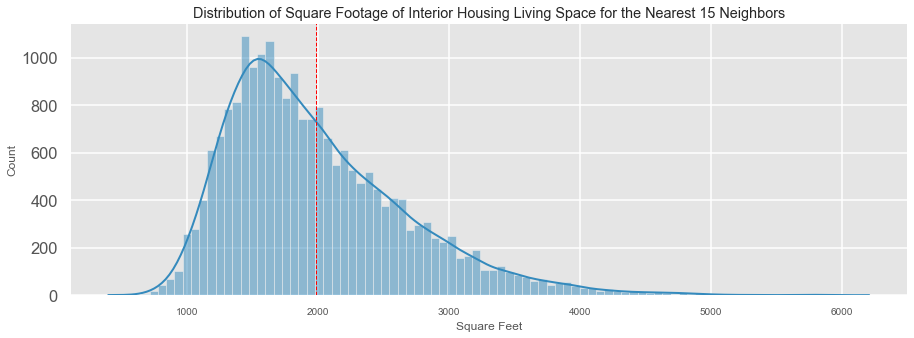

<Figure size 432x288 with 0 Axes>

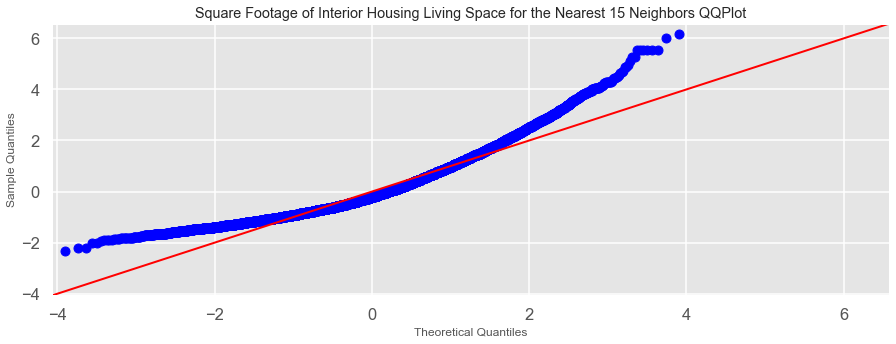

In [4687]:
#plot 'sqft_living15'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['sqft_living15'], kde = True)
plt.title('Distribution of Square Footage of Interior Housing Living Space for the Nearest 15 Neighbors')
plt.xlabel('Square Feet')
plt.axvline(kc_house['sqft_living15'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_living15_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_living15'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Square Footage of Interior Housing Living Space for the Nearest 15 Neighbors QQPlot')
plt.savefig('./Data & Figures/sqft_living15_qqplot')

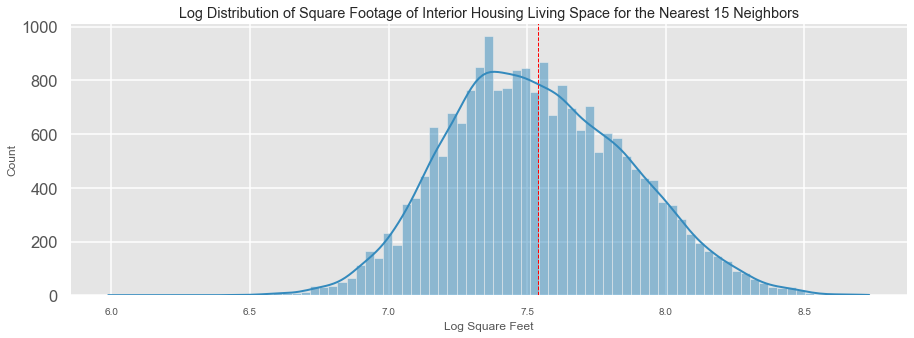

<Figure size 432x288 with 0 Axes>

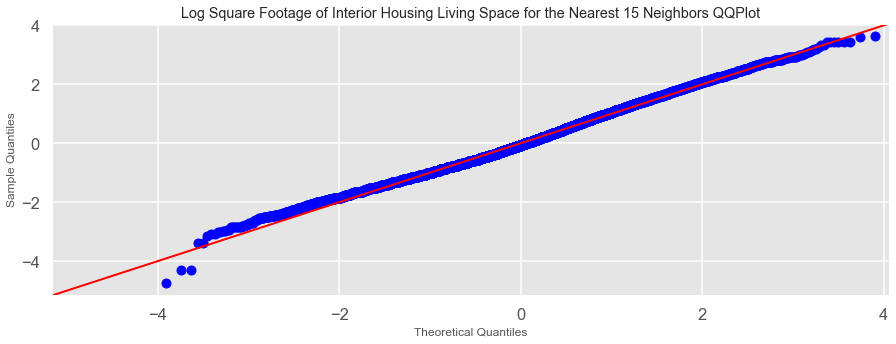

In [4688]:
#applying log transformation
kc_house['sqft_living15_log'] = np.log(kc_house['sqft_living15'])

#plot 'sqft_living15_log'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['sqft_living15_log'], kde = True)
plt.title('Log Distribution of Square Footage of Interior Housing Living Space for the Nearest 15 Neighbors')
plt.xlabel('Log Square Feet')
plt.axvline(kc_house['sqft_living15_log'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_living15_log_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_living15_log'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Log Square Footage of Interior Housing Living Space for the Nearest 15 Neighbors QQPlot')
plt.savefig('./Data & Figures/sqft_living15_log_qqplot')

In [4689]:
#get skewness
print('Skewness:', kc_house['sqft_living15_log'].skew()) #data is fairly symmetrical

#get kurtosis
print('Kurtosis:', kc_house['sqft_living15_log'].kurtosis()) #data is mesokurtic and has little outliers

Skewness: 0.20398810339269602
Kurtosis: -0.21021077047827896


<Figure size 1080x360 with 0 Axes>

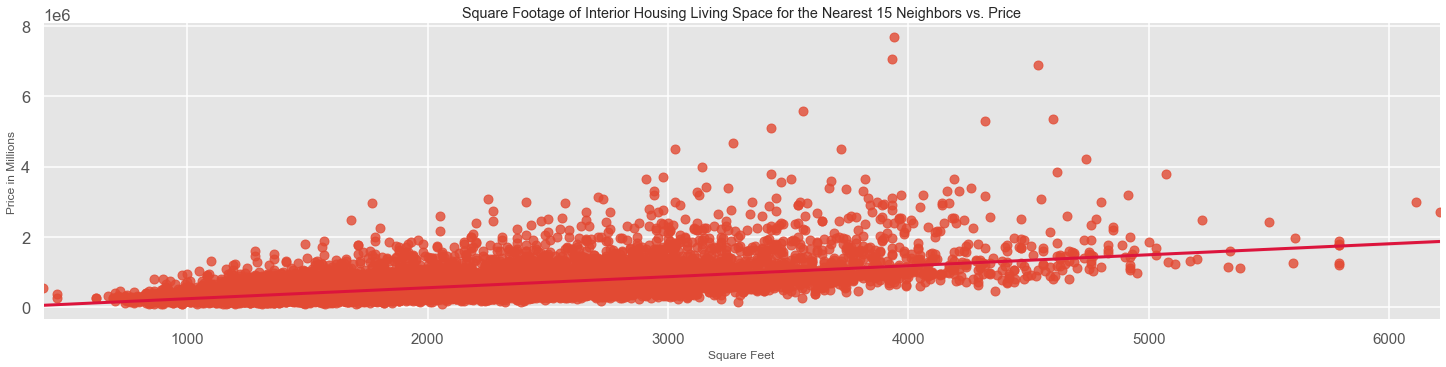

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

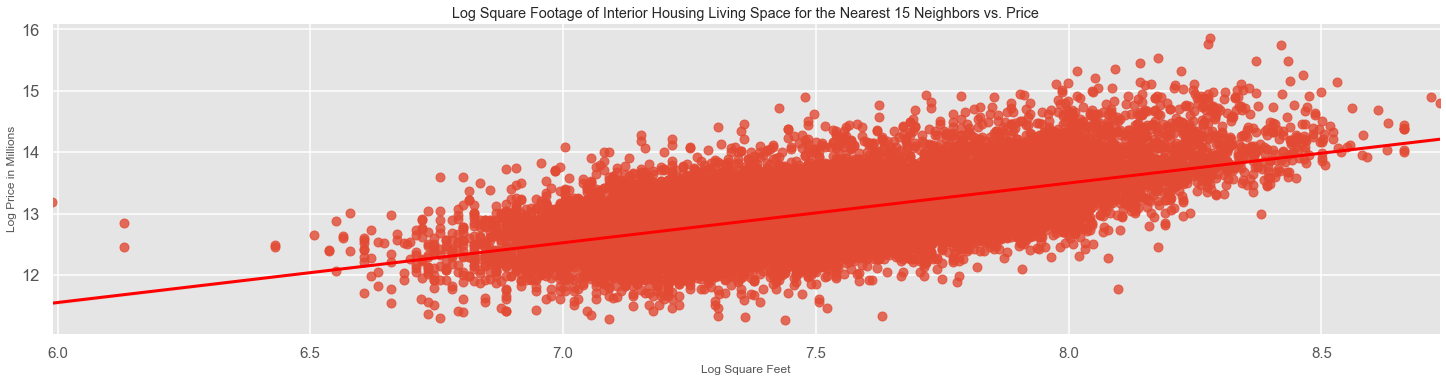

<Figure size 432x288 with 0 Axes>

In [4690]:
#plot 'price' vs. sqft_living15'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_living15',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})
plt.title('Square Footage of Interior Housing Living Space for the Nearest 15 Neighbors vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/sqft_living15_vs_price_lmplot')

#plot 'price_log' vs. sqft_living15_log'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_living15_log',
           y = 'price_log',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'red'})
plt.title('Log Square Footage of Interior Housing Living Space for the Nearest 15 Neighbors vs. Price')
plt.xlabel('Log Square Feet')
plt.ylabel('Log Price in Millions')
plt.xticks(fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/sqft_living15_log_vs_price_log_lmplot')

In [4691]:
kc_house[['sqft_living15', 'sqft_living15_log', 'price']].corr()

sqft_living15  sqft_living15_log     price
sqft_living15           1.000000           0.976833  0.584227
sqft_living15_log       0.976833           1.000000  0.542896
price                   0.584227           0.542896  1.000000

### Square footage of the land lots of the nearest 15 neighbors: 'sqft_lot15'

In [4425]:
#look at summary statistics & remove scientific notation
kc_house['sqft_lot15'].describe().apply(lambda x: format(x, 'f'))

count     21420.000000
mean      12775.718161
std       27345.621867
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10086.250000
max      871200.000000
Name: sqft_lot15, dtype: object

In [4692]:
#get skewness
print('Skewness:', kc_house['sqft_lot15'].skew()) #data is extremely skewed right

#get kurtosis
print('Kurtosis:', kc_house['sqft_lot15'].kurtosis()) #data is leptokurtic and has heavy outliers

Skewness: 9.51304456409537
Kurtosis: 150.95644529520288


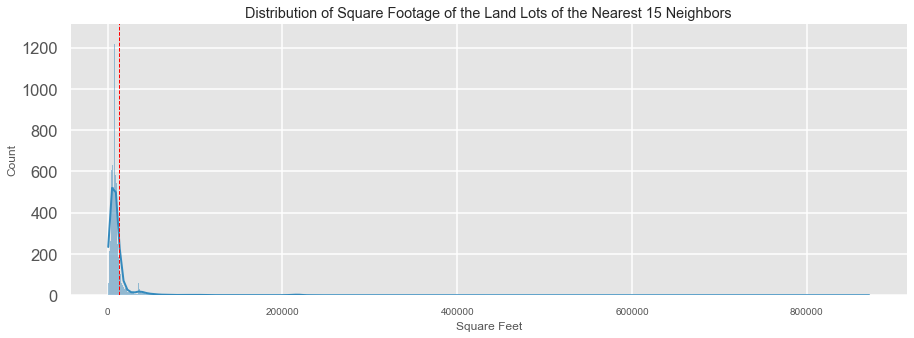

<Figure size 432x288 with 0 Axes>

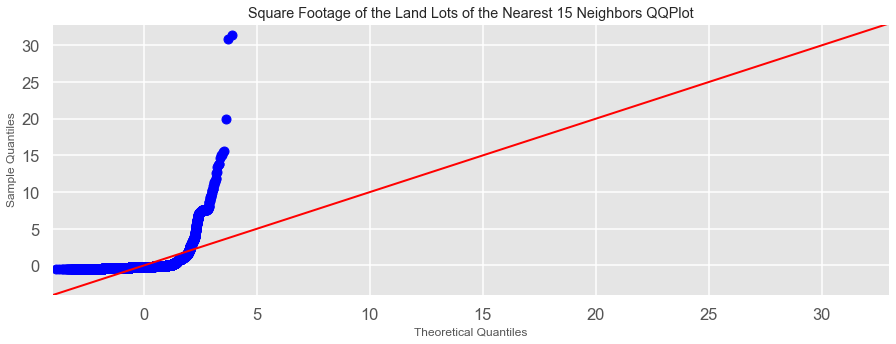

In [4693]:
#plot 'sqft_lot15'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['sqft_lot15'], kde = True)
plt.title('Distribution of Square Footage of the Land Lots of the Nearest 15 Neighbors')
plt.xlabel('Square Feet')
plt.axvline(kc_house['sqft_lot15'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_lot15_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_lot15'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Square Footage of the Land Lots of the Nearest 15 Neighbors QQPlot')
plt.savefig('./Data & Figures/sqft_lot15_qqplot')

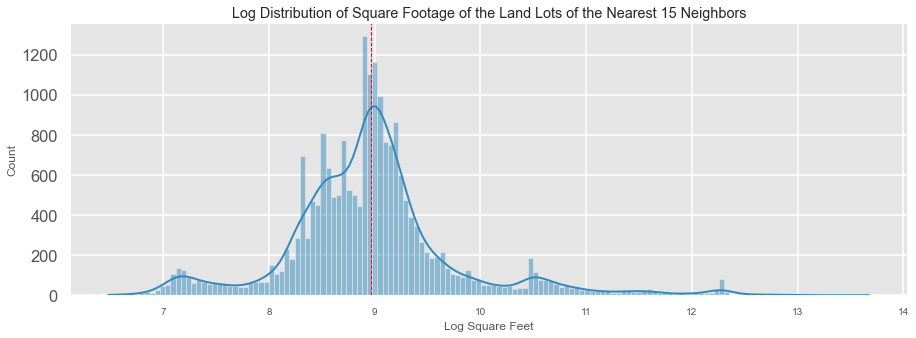

<Figure size 432x288 with 0 Axes>

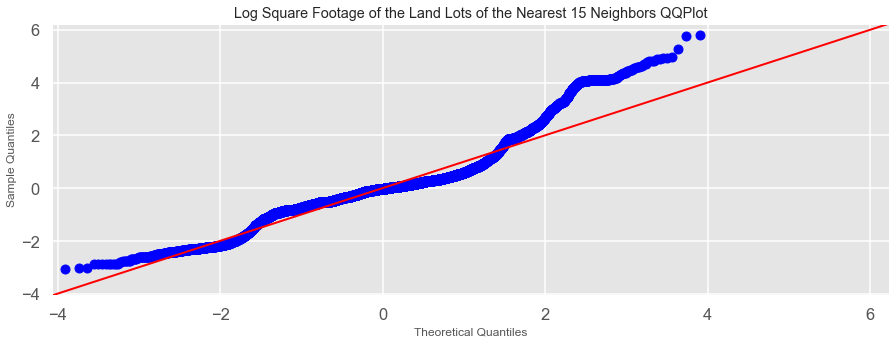

In [4694]:
#applying log transformation
kc_house['sqft_lot15_log'] = np.log(kc_house['sqft_lot15'])

#plot 'sqft_lot15'
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['sqft_lot15_log'], kde = True)
plt.title('Log Distribution of Square Footage of the Land Lots of the Nearest 15 Neighbors')
plt.xlabel('Log Square Feet')
plt.axvline(kc_house['sqft_lot15_log'].mean(),
           ls = '--', lw = 1, color = 'r')
plt.xticks(fontsize = 10)
plt.show()
plt.savefig('./Data & Figures/sqft_lot15_log_distribution_histplot')

#check for normality
fig = sm.graphics.qqplot(kc_house['sqft_lot15_log'], 
                         dist = stats.norm, 
                         line = '45', 
                         fit = True)
fig.set_size_inches(15, 5)
plt.title('Log Square Footage of the Land Lots of the Nearest 15 Neighbors QQPlot')
plt.savefig('./Data & Figures/sqft_lot15_log_qqplot')

In [4695]:
#get skewness
print('Skewness:', kc_house['sqft_lot15_log'].skew()) #data is moderately skewed right

#get kurtosis
print('Kurtosis:', kc_house['sqft_lot15_log'].kurtosis()) #data is mesokurtic and has little outliers

Skewness: 0.964778965757191
Kurtosis: 3.547795859057869


<Figure size 1080x360 with 0 Axes>

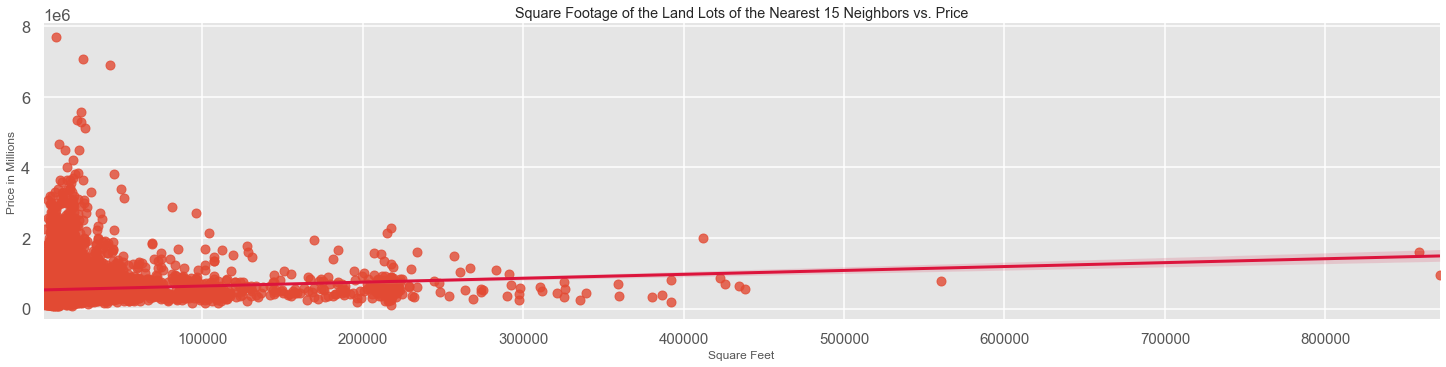

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

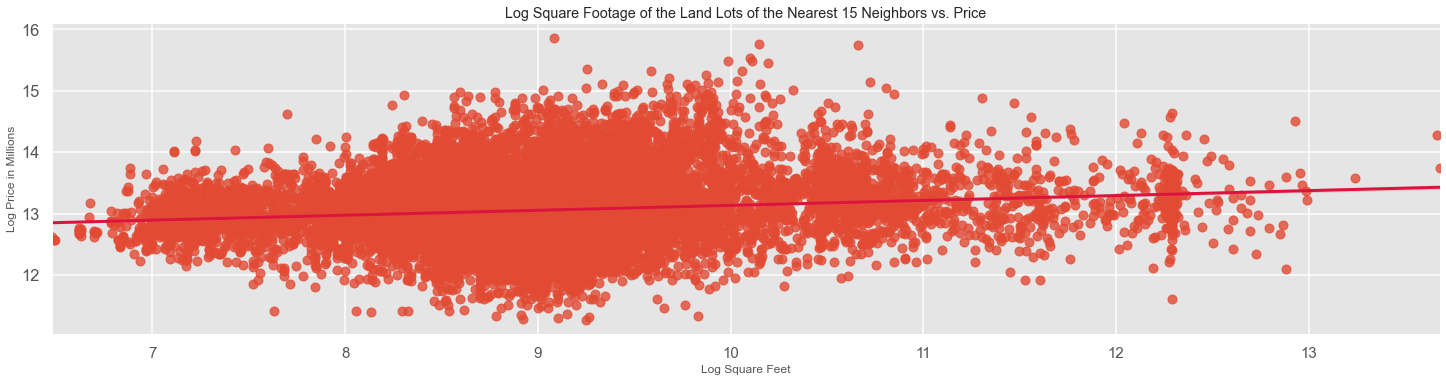

<Figure size 432x288 with 0 Axes>

In [4696]:
#plot 'price' vs. sqft_lot15'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_lot15',
           y = 'price',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})
plt.title('Square Footage of the Land Lots of the Nearest 15 Neighbors vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price in Millions')
plt.xticks(fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/sqft_lot15_vs_price_lmplot')

#plot 'price_log' vs. sqft_lot15_log'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'sqft_lot15_log',
           y = 'price_log',
           data = kc_house, 
           aspect = 4, line_kws={'color': 'crimson'})
plt.title('Log Square Footage of the Land Lots of the Nearest 15 Neighbors vs. Price')
plt.xlabel('Log Square Feet')
plt.ylabel('Log Price in Millions')
plt.xticks(fontsize = 15)
plt.show()
plt.savefig('./Data & Figures/sqft_lot15_log_vs_price_log_lmplot')

In [4435]:
kc_house[['sqft_lot15', 'sqft_lot15_log', 'price']].corr()

sqft_lot15     price
sqft_lot15    1.000000  0.082247
price         0.082247  1.000000

'sqft_lot15' has a very low correlation with 'price' hence we will not be using this feature.

## Ordinal variables

### Number of Bedrooms: 'bedrooms'

In [4436]:
kc_house['bedrooms'].nunique()

12

In [4437]:
y_values = kc_house['bedrooms'].value_counts(ascending=False)
x_values = y_values.index

y_values

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


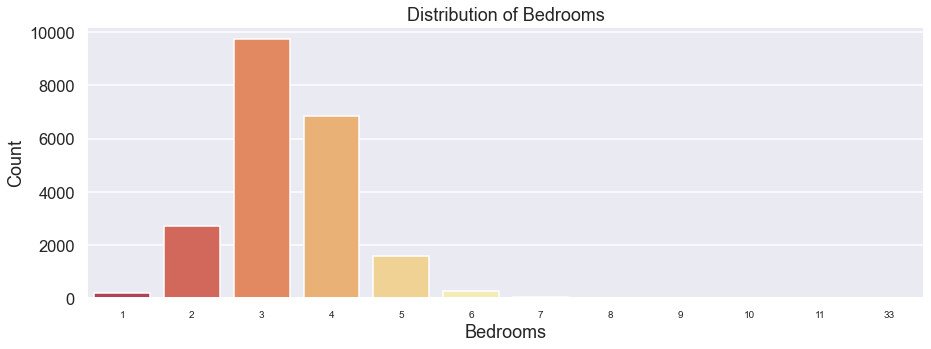

In [4438]:
#plot 'bedroom' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values,
            palette = "Spectral")

#set labels
plt.title('Distribution of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

#save
plt.savefig('./Data & Figures/bedrooms_distribution_barplot')

<Figure size 1080x1080 with 0 Axes>

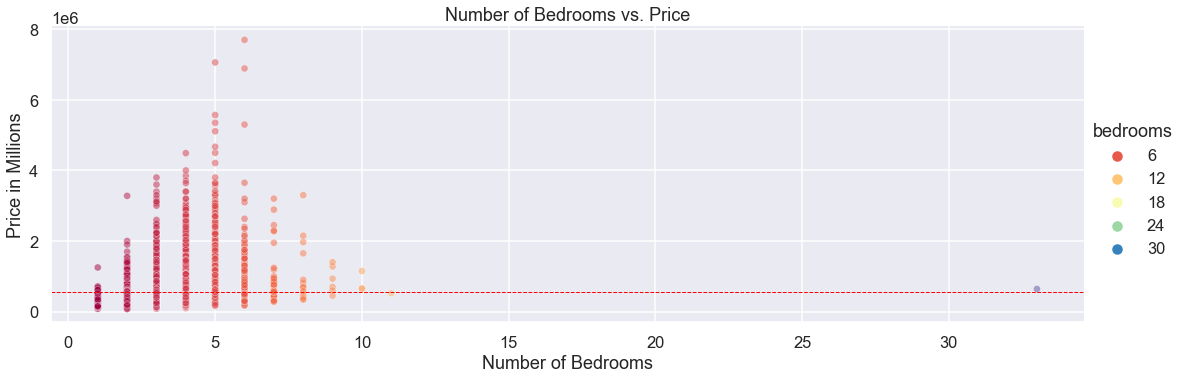

In [4440]:
#plot 'bedrooms' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'bedrooms',
            y = 'price',
            hue = 'bedrooms',
            data = kc_house,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral')

#set labels
plt.title('Number of Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Millions')

#show
plt.show()

#save
plt.savefig('./Data & Figures/bedrooms_vs_price_relplot')

We can see there is an outlier at 30+ number of bedrooms. 

In [4442]:
#check out the outlier at 9+ number of bedrooms
kc_house[kc_house['bedrooms'] > 9]

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
19239 2014-12-29   660000.0        10       3.00         2920      3745   
15147 2014-10-29   650000.0        10       2.00         3610     11914   
15856 2014-06-25   640000.0        33       1.75         1620      6000   
8748  2014-08-21   520000.0        11       3.00         3000      4960   
13301 2014-08-14  1150000.0        10       5.25         4590     10920   

       floors  waterfront  condition  grade  sqft_above  sqft_basement  \
19239     2.0         0.0          4      7        1860         1060.0   
15147     2.0         0.0          4      7        3010          600.0   
15856     1.0         0.0          5      7        1040          580.0   
8748      2.0         0.0          3      7        2400          600.0   
13301     1.0         0.0          3      9        2500         2090.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
19239      1913           0.0    98105  47.6635 -122.320           1810   
15147      1958           0.0    98006  47.5705 -122.175           2040   
15856      1947           0.0    98103  47.6878 -122.331           1330   
8748       1918        1999.0    98106  47.5560 -122.363           1420   
13301      2008           0.0    98004  47.5861 -122.113           2730   

       sqft_lot15  basement  
19239        3745         1  
15147       11914         1  
15856        4700         1  
8748         4960         1  
13301       10400         1

We see that the house with 33 bedrooms only has 1.75 bathrooms, which makes little sense. There are also houses with 10-11 bedrooms with only 2-3 bathrroms, which also makes little sense. We can assume that there is a typo in '33' or in '1.75': 3 bedrooms with 1.75 bathrooms, 13 bedrooms with 1.75 bathrooms or 33 bedrooms with 17.5 bathrooms, etc. Since this is the outlier that impacts our data spread, we will replace with the median value of 'bedrooms'.

In [4443]:
#replace 33-bedrooms data with median value
kc_house.loc[kc_house['bedrooms'] == 33, 'bedrooms'] = kc_house['bedrooms'].median()

#check again to see if it is gone
kc_house.loc[kc_house['bedrooms'] == 33]

Empty DataFrame
Columns: [date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, basement]
Index: []

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


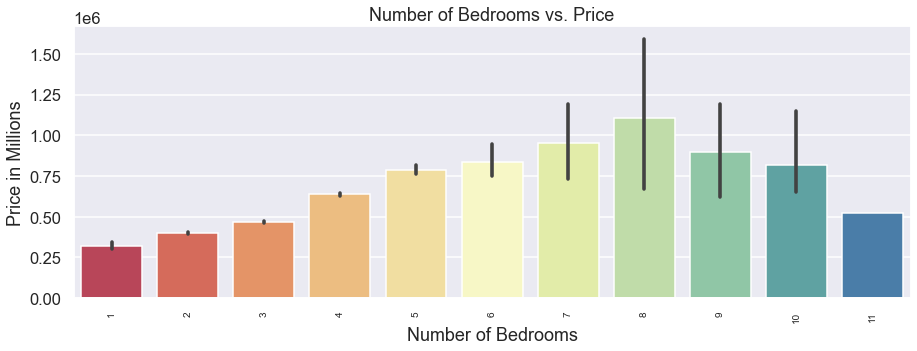

In [4446]:
#plot 'bedrooms' vs. 'price'  distribution
plt.figure(figsize = (15, 5))
sns.barplot(kc_house['bedrooms'], kc_house['price'], 
            palette = "Spectral")

#set labels
plt.title('Number of Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 10, rotation = 90)

#show
plt.show()

#save
plt.savefig('./Data & Figures/bedrooms_vs_price_barplot')

<Figure size 1080x1080 with 0 Axes>

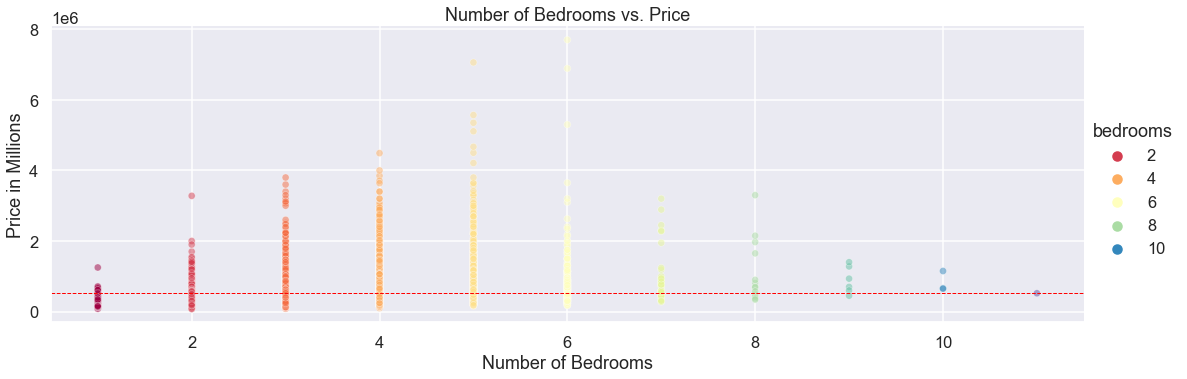

In [4448]:
#plot 'bedrooms' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'bedrooms',
            y = 'price',
            hue = 'bedrooms',
            data = kc_house,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Number of Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price in Millions')

#show
plt.show()

#save
plt.savefig('./Data & Figures/bedrooms_vs_price_relplot')

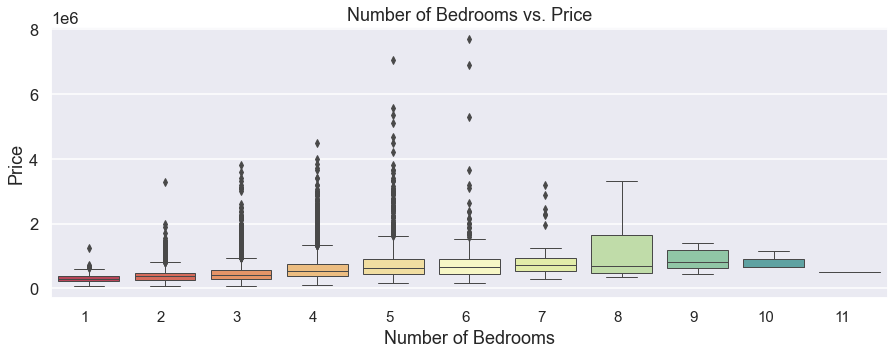

In [4450]:
#plot 'bedrooms' vs. 'price'
plt.figure(figsize = (15, 5))
sns.boxplot(x = kc_house['bedrooms'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')

#set labels
plt.title('Number of Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')

#set xticks
plt.xticks(ha = 'right', fontsize = 15)

#show
plt.show()

#save
plt.savefig('./Data & Figures/bedrooms_vs_price_boxplot')

In [4452]:
kc_house[['bedrooms', 'price']].corr()

bedrooms     price
bedrooms  1.000000  0.316846
price     0.316846  1.000000

### Number of Bathrooms: 'bathrooms'

In [4453]:
kc_house['bathrooms'].nunique()

29

In [4454]:
y_values = kc_house['bathrooms'].value_counts(ascending=False)
x_values = y_values.index

y_values

2.50    5352
1.00    3793
1.75    3020
2.25    2029
2.00    1912
1.50    1429
2.75    1182
3.00     746
3.50     729
3.25     586
3.75     155
4.00     134
4.50      98
4.25      79
0.75      70
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.50       2
8.00       2
6.25       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


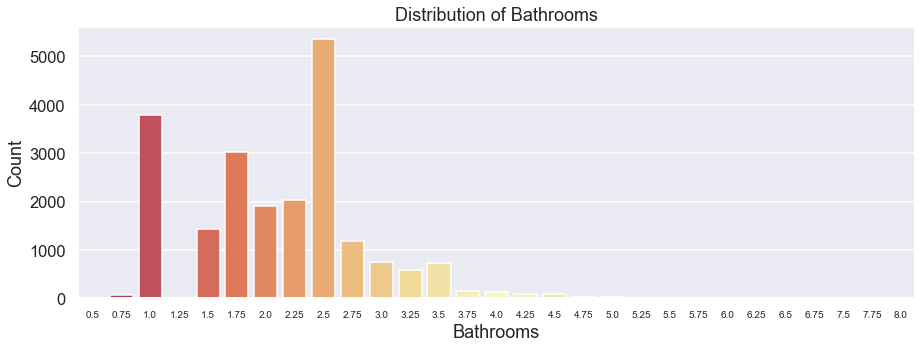

In [4455]:
#plot 'bathrooms' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")

#set labels
plt.title('Distribution of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

#save
plt.savefig('./Data & Figures/bathrooms_distribution_barplot')

In [4456]:
#save
plt.savefig('./Data & Figures/bathrooms_distribution_barplot')

<Figure size 432x288 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


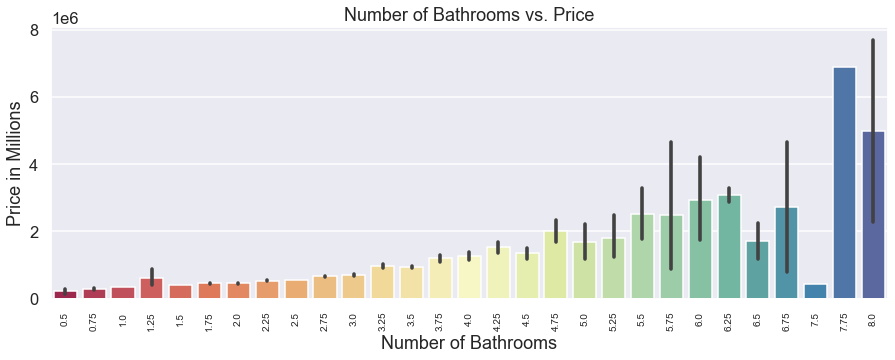

In [4457]:
#plot 'bathrooms' vs. 'price'  distribution
plt.figure(figsize = (15, 5))
sns.barplot(kc_house['bathrooms'], kc_house['price'], 
            palette = "Spectral")

#set labels
plt.title('Number of Bathrooms vs. Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 10, rotation = 90)

#show
plt.show()

#save
plt.savefig('./Data & Figures/bathrooms_vs_price_barplot')

<Figure size 1080x1080 with 0 Axes>

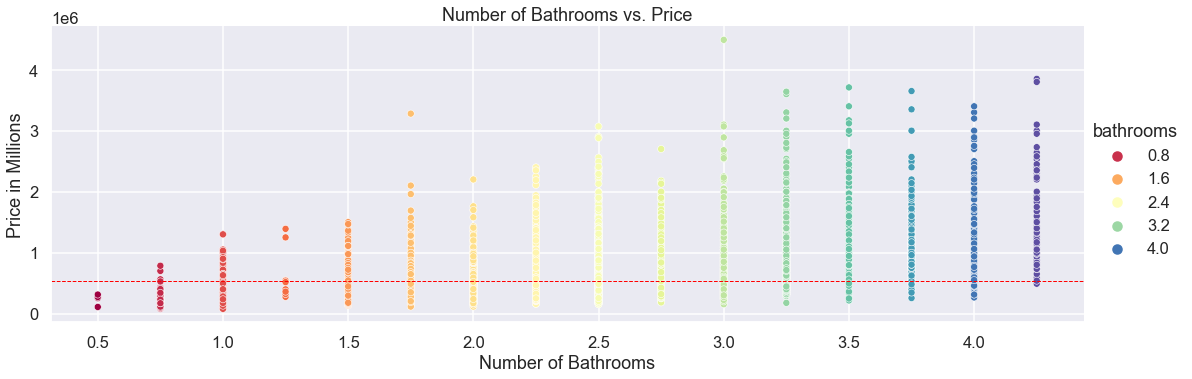

In [4461]:
#plot 'bathrooms' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'bathrooms',
            y = 'price',
            hue = 'bathrooms',
            data = kc_house,
            s = 50, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Number of Bathrooms vs. Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price in Millions')

#show
plt.show()

#save
plt.savefig('./Data & Figures/bathrooms_no_outlier_vs_price_relplot')

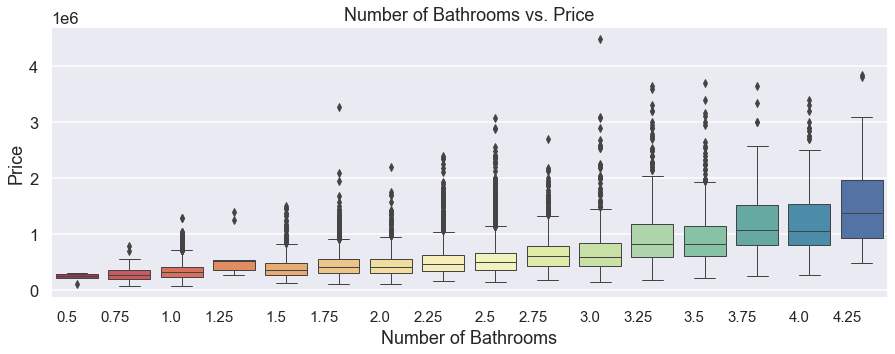

In [4463]:
#plot 'bathrooms' vs. 'price'
plt.figure(figsize = (15, 5))
sns.boxplot(x = kc_house['bathrooms'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')

#set labels
plt.title('Number of Bathrooms vs. Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')

#set xticks
plt.xticks(ha = 'right', fontsize = 15)

#show
plt.show()

#save
plt.savefig('./Data & Figures/bathrooms_no_outlier_vs_price_boxplot')

In [4465]:
kc_house[['bathrooms', 'price']].corr()

bathrooms     price
bathrooms   1.000000  0.489101
price       0.489101  1.000000

### Grade: overall grade given to the housing unit, based on King County grading system: 'grade'

From grade 1 to 13:

1-3 = Falls short of minimum building standards. Normally cabin or inferior structure.

4 = Generally older, low quality construction. Does not meet code.

5 = Low construction costs and workmanship. Small, simple design.

6 = Lowest grade currently meeting building code. Low quality materials and simple designs.

7 = Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 = Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 = Better architectural design with extra interior and exterior design and quality.

10 = Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 = Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 = Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 = Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [ ]:
kc_house['grade'].nunique()

In [ ]:
y_values = kc_house['grade'].value_counts(ascending = False)
x_values = y_values.index

y_values

In [ ]:
#plot 'grade' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")

#set labels
plt.title('Distribution of Grade')
plt.xlabel('Grade')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

#save
plt.savefig('./Data & Figures/grade_distribution_barplot')

In [ ]:
#plot 'grade' vs. 'price'  distribution
plt.figure(figsize = (15, 5))
sns.barplot(kc_house['grade'], kc_house['price'], 
            palette = "Spectral")

#set labels
plt.title('Grade vs. Price')
plt.xlabel('Grade')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 10, rotation = 90)

#show
plt.show()

#save
plt.savefig('./Data & Figures/grade_vs_price_barplot')

We notice that the feature 'grade' plays a huge role in deciding the price of a house.

In [ ]:
#plot 'grade' vs 'price' 
plt.figure(figsize = (15, 5))
sns.relplot(x = 'grade',
            y = 'price',
            hue = 'grade',
            data = kc_house,
            s = 50, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Grade vs. Price')
plt.xlabel('Grade')
plt.ylabel('Price in Millions')

#show
plt.show()

#save
plt.savefig('./Data & Figures/grade_vs_price_relplot')

In [ ]:
#plot 'grade' vs. 'price'
plt.figure(figsize = (15, 5))
sns.boxplot(x = kc_house['grade'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')

#set labels
plt.title('Grade vs. Price')
plt.xlabel('Grade')
plt.ylabel('Price')

#set xticks
plt.xticks(ha = 'right', fontsize = 15)

#show
plt.show()

#save
plt.savefig('./Data & Figures/grade_vs_price_boxplot')

In [ ]:
#get correlation
kc_house[['grade', 'price']].corr()

We observe that 'grade' has a linear correlation with price. Although it is a categorical data, we will not use OHE on it.

## Categorical variables

### Number of Floors: 'floors'

In [4466]:
kc_house['floors'].nunique()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


6

In [4467]:
y_values = kc_house['floors'].value_counts(ascending=False)
x_values = y_values.index

y_values

1.0    10532
2.0     8055
1.5     1883
3.0      599
2.5      153
3.5        7
Name: floors, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


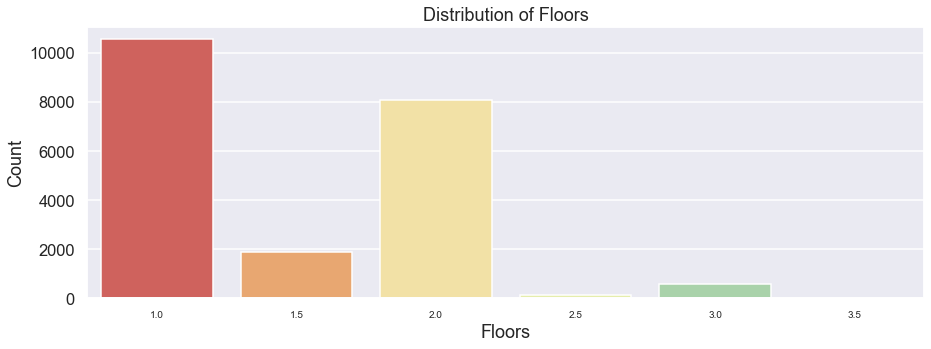

In [4468]:
#plot 'floors' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")

#set labels
plt.title('Distribution of Floors')
plt.xlabel('Floors')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

#save
plt.savefig('./Data & Figures/floors_distribution_barplot')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


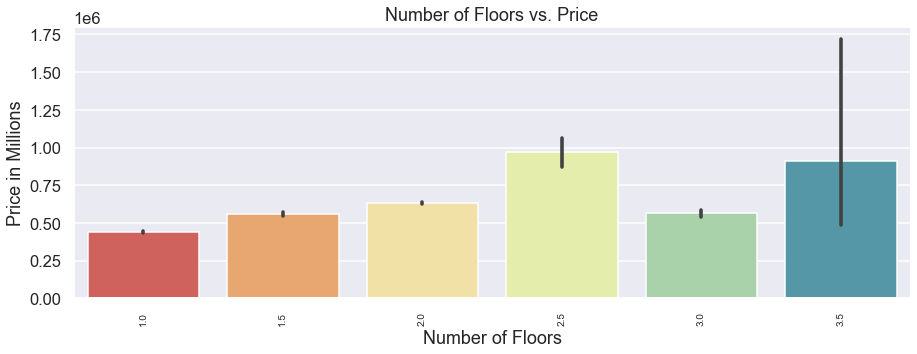

In [4470]:
#plot 'floors' vs. 'price'  distribution
plt.figure(figsize = (15, 5))
sns.barplot(kc_house['floors'], kc_house['price'], 
            palette = "Spectral")

#set labels
plt.title('Number of Floors vs. Price')
plt.xlabel('Number of Floors')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 10, rotation = 90)

#show
plt.show()

#save
plt.savefig('./Data & Figures/floors_vs_price_barplot')

<Figure size 1080x1080 with 0 Axes>

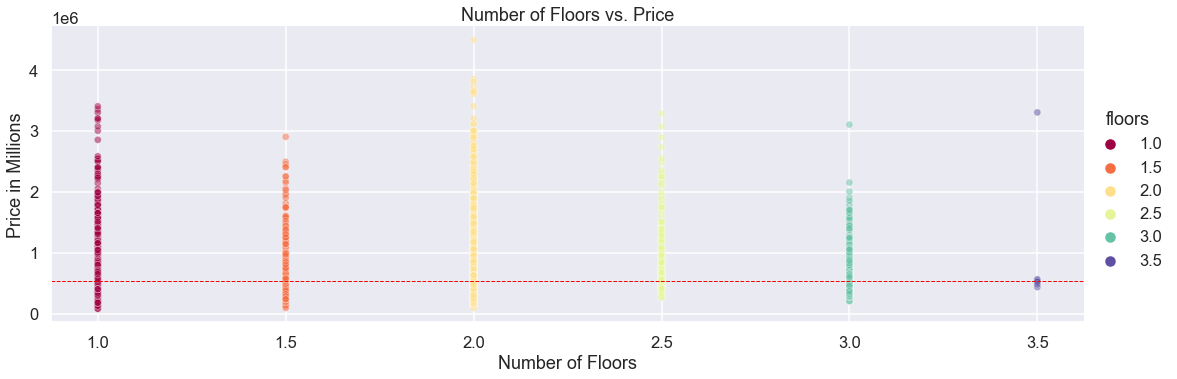

In [4472]:
#plot 'floors' vs 'price' 
plt.figure(figsize = (15, 15))
sns.relplot(x = 'floors',
            y = 'price',
            hue = 'floors',
            data = kc_house,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Number of Floors vs. Price')
plt.xlabel('Number of Floors')
plt.ylabel('Price in Millions')

#show
plt.show()

#save
plt.savefig('./Data & Figures/floors_vs_price_relplot')

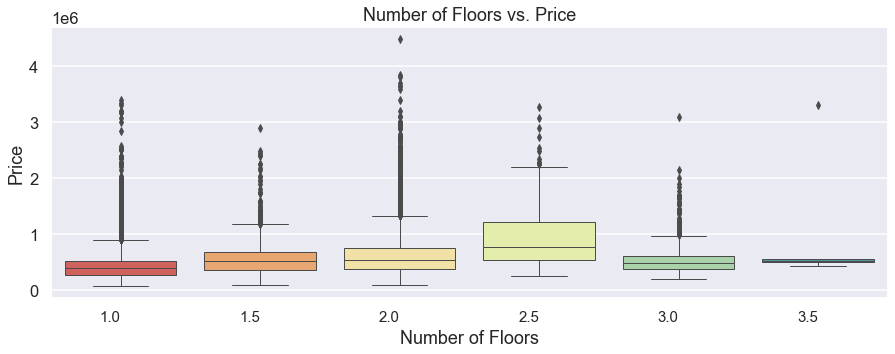

In [4474]:
#plot 'floors' vs. 'price'
plt.figure(figsize = (15, 5))
sns.boxplot(x = kc_house['floors'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')

#set labels
plt.title('Number of Floors vs. Price')
plt.xlabel('Number of Floors')
plt.ylabel('Price')

#set xticks
plt.xticks(ha = 'right', fontsize = 15)

#show
plt.show()

#save
plt.savefig('./Data & Figures/floors_vs_price_boxplot')

In [4476]:
kc_house[['floors', 'price']].corr()

floors     price
floors  1.000000  0.258061
price   0.258061  1.000000

### Waterfront: 'waterfront'

In [4477]:
kc_house['waterfront'].nunique()

2

In [4478]:
y_values = kc_house['waterfront'].value_counts(ascending=False)
x_values = y_values.index

y_values

0.0    21097
1.0      132
Name: waterfront, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


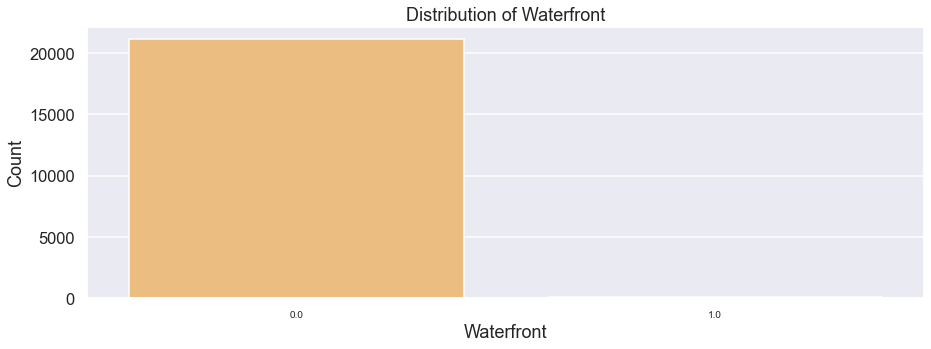

In [4479]:
#plot 'waterfront' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")

#set labels
plt.title('Distribution of Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

#save
plt.savefig('./Data & Figures/waterfront_distribution_barplot')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


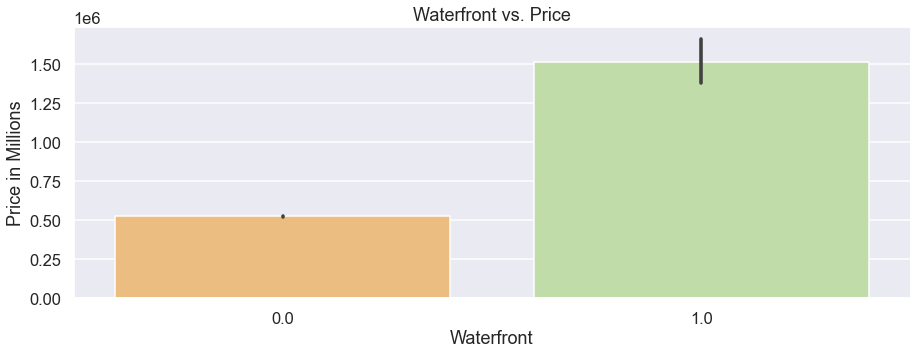

In [4568]:
#plot 'waterfront' vs. 'price'  distribution
plt.figure(figsize = (15, 5))
sns.barplot(kc_house['waterfront'], kc_house['price'], 
            palette = "Spectral")

#set labels
plt.title('Waterfront vs. Price')
plt.xlabel('Waterfront')
plt.ylabel('Price in Millions')

#show
plt.show()

#save
plt.savefig('./Data & Figures/waterfront_vs_price_barplot')

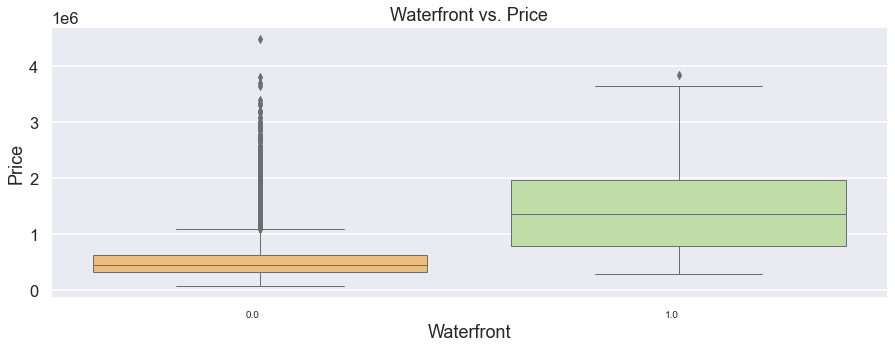

In [4483]:
#plot 'waterfront' vs. 'price'
plt.figure(figsize = (15, 5))
sns.boxplot(x = kc_house['waterfront'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')

#set labels
plt.title('Waterfront vs. Price')
plt.xlabel('Waterfront')
plt.ylabel('Price')

#set xticks
plt.xticks(fontsize = 10, ha = 'right')

#show
plt.show()

#save
plt.savefig('./Data & Figures/waterfront_vs_price_boxplot')

In [4485]:
kc_house[['waterfront', 'price']].corr()

waterfront     price
waterfront    1.000000  0.235659
price         0.235659  1.000000

### Condition: 'condition'

Relative to age and grade. Coded 1-5.

1 = Poor - Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair - Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average - Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good - No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5 = Very Good - All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

In [4486]:
kc_house['condition'].nunique()

5

In [4487]:
y_values = kc_house['condition'].value_counts(ascending = False)
x_values = y_values.index

y_values

3    13741
4     5621
5     1677
2      162
1       28
Name: condition, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


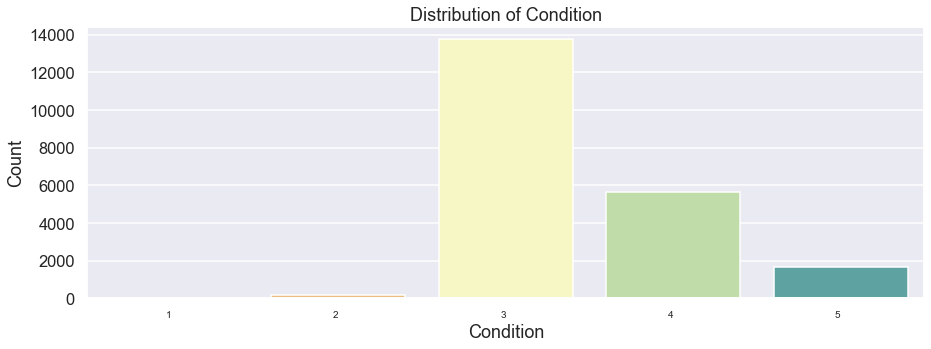

In [4488]:
#plot 'condition' distribution
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            palette = "Spectral")

#set labels
plt.title('Distribution of Condition')
plt.xlabel('Condition')
plt.ylabel('Count')

#set xticks
plt.xticks(fontsize = 10, ha = 'right')

#show
plt.show()

#save
plt.savefig('./Data & Figures/condition_distribution_barplot')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


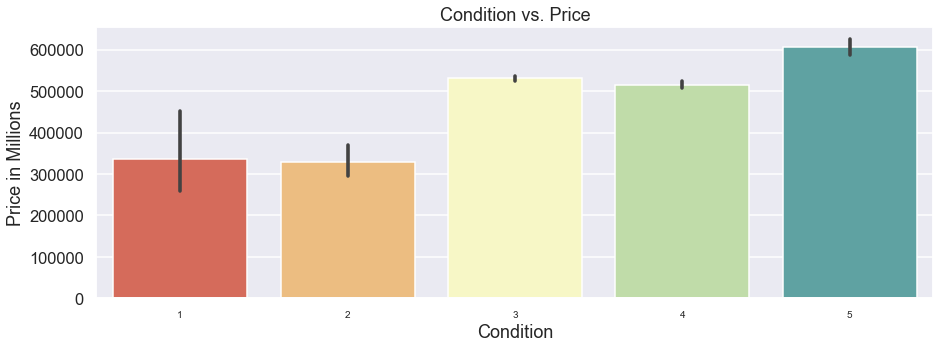

In [4490]:
#plot 'condition' vs. 'price'  distribution
plt.figure(figsize = (15, 5))
sns.barplot(kc_house['condition'], kc_house['price'], 
            palette = "Spectral")

#set labels
plt.title('Condition vs. Price')
plt.xlabel('Condition')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

#save
plt.savefig('./Data & Figures/condition_vs_price_barplot')

<Figure size 1080x360 with 0 Axes>

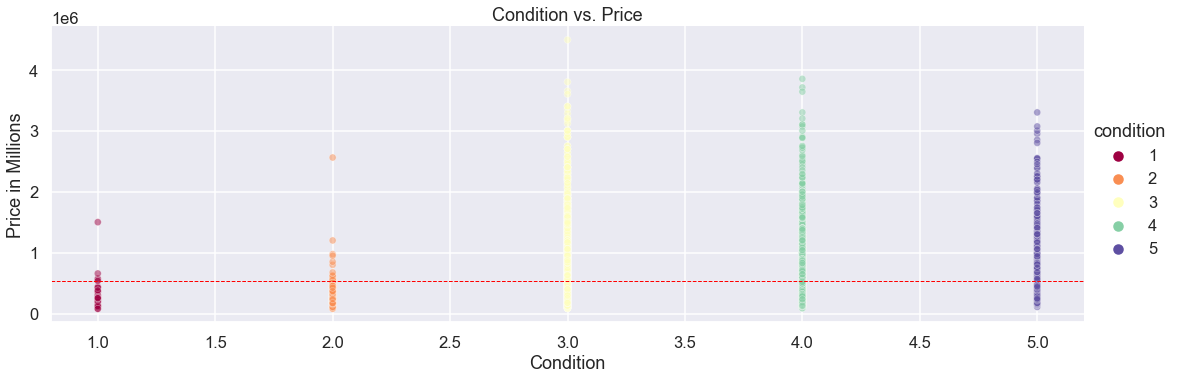

In [4492]:
#plot 'condition' vs 'price' 
plt.figure(figsize = (15, 5))
sns.relplot(x = 'condition',
            y = 'price',
            hue = 'condition',
            data = kc_house,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Condition vs. Price')
plt.xlabel('Condition')
plt.ylabel('Price in Millions')

#show
plt.show()

#save
plt.savefig('./Data & Figures/condition_vs_price_relplot')

We see that majority of the houses are in condition 3 (average) and they surprisingly perform better than those with condition 4 (good) and condition 5 (very good). This could be an interesting feature to include in our model since there are obviously other interactions in play.

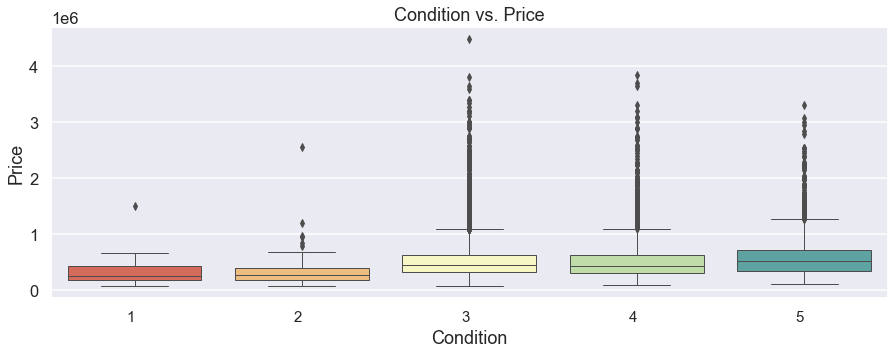

In [4494]:
#plot 'condition' vs. 'price'
plt.figure(figsize = (15, 5))
sns.boxplot(x = kc_house['condition'], 
            y = kc_house['price'], 
            linewidth = 1,
            palette = 'Spectral')

#set labels
plt.title('Condition vs. Price')
plt.xlabel('Condition')
plt.ylabel('Price')

#set xticks
plt.xticks(ha = 'right', fontsize = 15)

#show
plt.show()

#save
plt.savefig('./Data & Figures/condition_vs_price_boxplot')

In [4496]:
kc_house[['condition', 'price']].corr()

condition     price
condition   1.000000  0.045383
price       0.045383  1.000000

## Time Data: ‘date’, ‘yr_built’, ‘yr_renovated’

### ‘date’, 'yr_built'

In [4508]:
#get summary statistics
kc_house['date'].describe()

<ipython-input-4508-aa0088fc91f1>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  kc_house['date'].describe()


count                   21229
unique                    372
top       2014-06-23 00:00:00
freq                      141
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

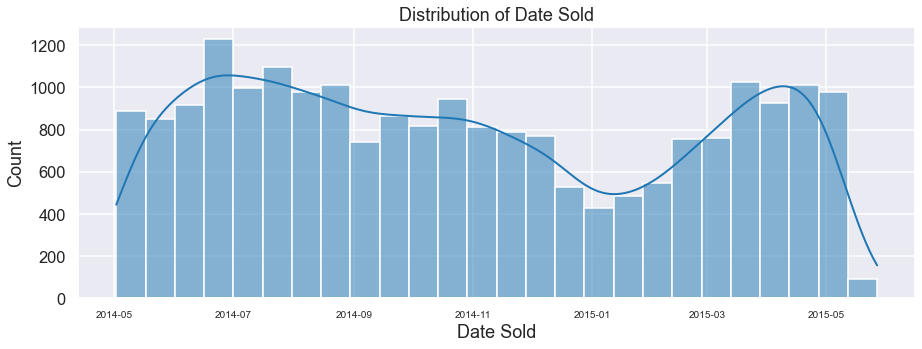

In [4509]:
#plot 'date' distribution
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['date'], kde = True)

#set labels
plt.title('Distribution of Date Sold')
plt.xlabel('Date Sold')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

#save
plt.savefig('./Data & Figures/date_histtplot')

<Figure size 1080x360 with 0 Axes>

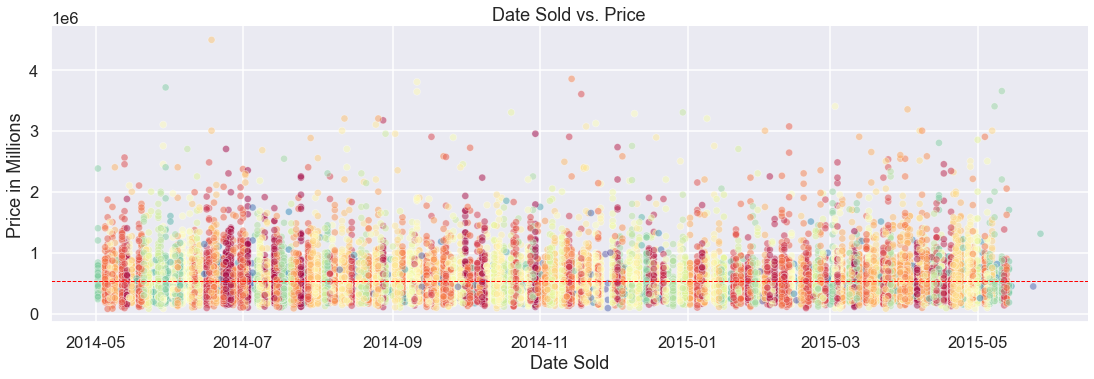

In [4511]:
#plot 'date' vs 'price' 
plt.figure(figsize = (15, 5))
sns.relplot(x = 'date',
            y = 'price',
            hue = 'date',
            data = kc_house,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral', legend = False)

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Date Sold vs. Price')
plt.xlabel('Date Sold')
plt.ylabel('Price in Millions')

#show
plt.show()

#save
plt.savefig('./Data & Figures/date_reltplot')

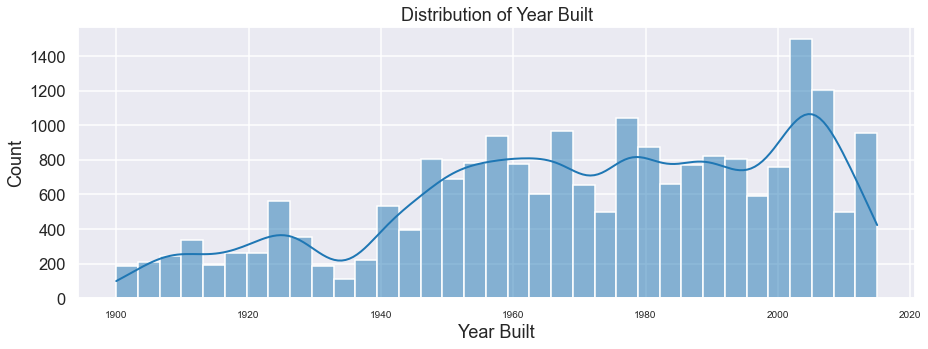

In [4513]:
#plot 'date' distribution
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['yr_built'], kde = True)

#set labels
plt.title('Distribution of Year Built')
plt.xlabel('Year Built')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

#save
plt.savefig('./Data & Figures/yr_built_histplot')

<Figure size 1080x360 with 0 Axes>

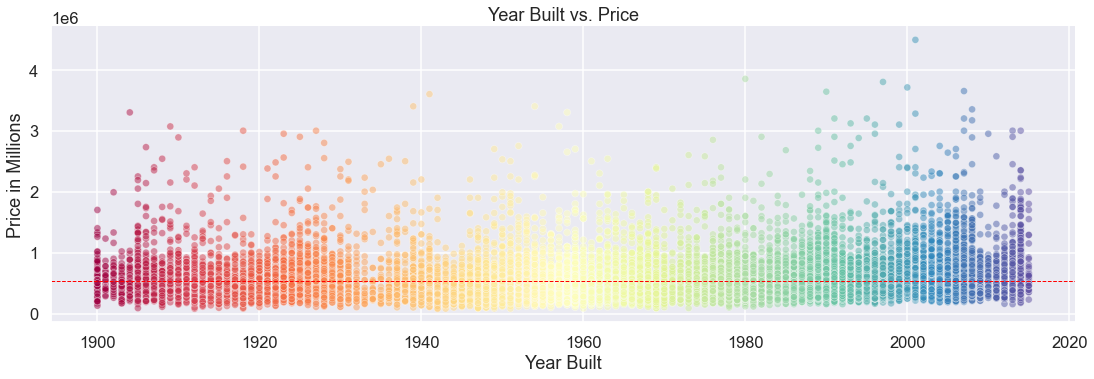

In [4515]:
#plot 'date' vs 'price' 
plt.figure(figsize = (15, 5))
sns.relplot(x = 'yr_built',
            y = 'price',
            hue = 'yr_built',
            data = kc_house,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral', legend = False)

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Year Built vs. Price')
plt.xlabel('Year Built')
plt.ylabel('Price in Millions')

#show
plt.show()

#save
plt.savefig('./Data & Figures/yr_built_vs_price_relplot')

In [4516]:
#we see from above that the dataset most current year is 2015
#use 2015 to calculate the house age
kc_house['age'] = 2015 - kc_house['yr_built']
kc_house.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15937 2014-10-30  268950.0         3       1.00         1320      8100   
20963 2014-07-03  399900.0         2       1.75         1410      1005   
7614  2014-06-24  339000.0         3       1.00         1100      4128   
3257  2015-03-11  380000.0         2       1.00         1040      7372   
16723 2014-07-25  365000.0         5       2.00         1600      4168   

       floors  waterfront  condition  grade  ...  sqft_basement  yr_built  \
15937     1.0         0.0          3      6  ...          440.0      1943   
20963     1.5         0.0          3      9  ...          510.0      2011   
7614      1.0         0.0          4      7  ...          380.0      1942   
3257      1.0         0.0          5      7  ...          200.0      1939   
16723     1.5         0.0          3      7  ...            0.0      1927   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
15937           0.0    98166  47.4697 -122.351           1000        8100   
20963           0.0    98027  47.5446 -122.018           1440        1188   
7614            0.0    98126  47.5296 -122.379           1510        4538   
3257            0.0    98126  47.5285 -122.378           1930        5150   
16723           0.0    98126  47.5297 -122.381           1190        4168   

       basement  age  
15937         1   72  
20963         1    4  
7614          1   73  
3257          1   76  
16723         0   88  

[5 rows x 21 columns]

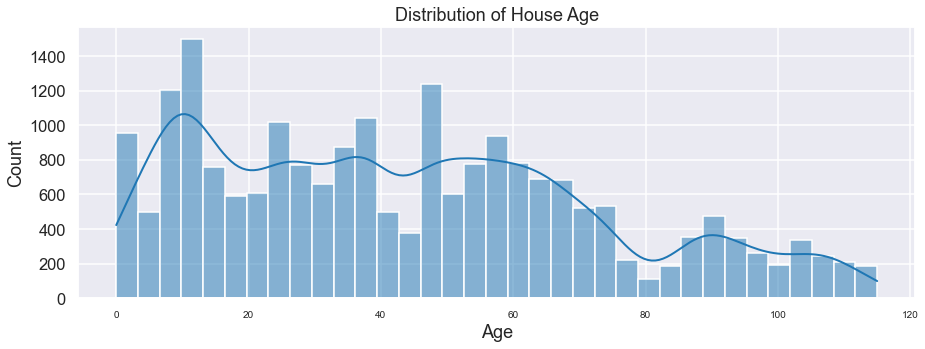

In [4517]:
#plot 'age' distribution
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['age'], kde = True)

#set labels
plt.title('Distribution of House Age')
plt.xlabel('Age')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

#save
plt.savefig('./Data & Figures/age_distribution_histplot')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


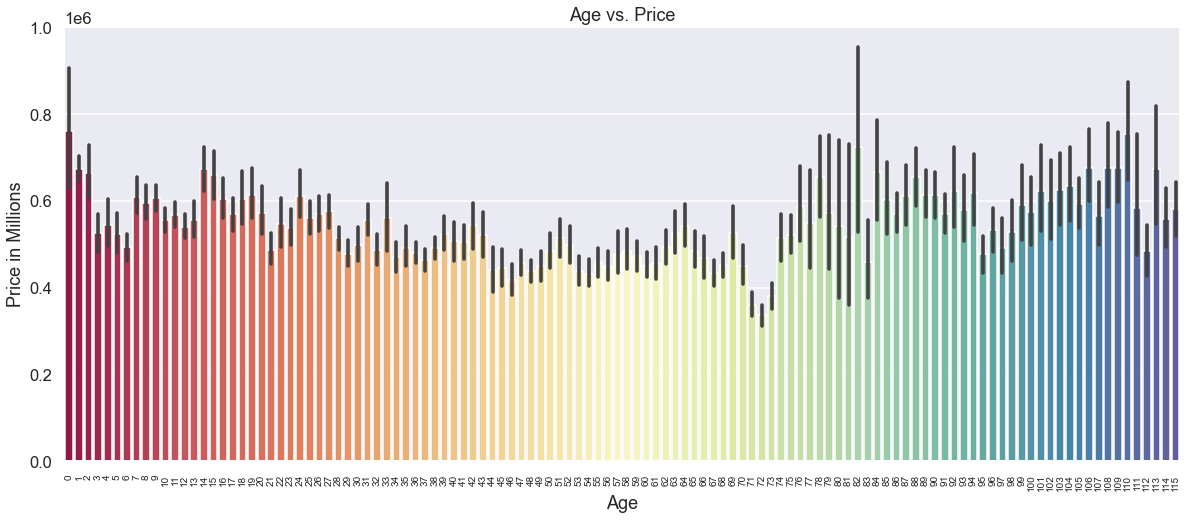

In [4519]:
#plot 'age' vs. 'price' distribution
plt.figure(figsize = (20, 8))
sns.barplot(kc_house['age'], kc_house['price'], 
            palette = "Spectral")

#set labels
plt.title('Age vs. Price')
plt.xlabel('Age')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 10, rotation = 90)

#show
plt.show()

#save
plt.savefig('./Data & Figures/age_vs_price_barplot')

<Figure size 1080x360 with 0 Axes>

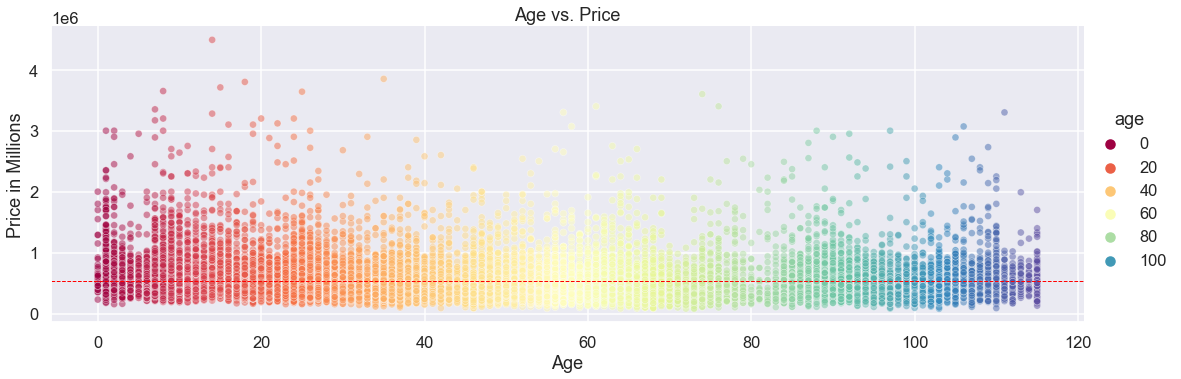

In [4521]:
#plot 'age' vs 'price' 
plt.figure(figsize = (15, 5))
sns.relplot(x = 'age',
            y = 'price',
            hue = 'age',
            data = kc_house,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r', label = 'Mean Price')

#set labels
plt.title('Age vs. Price')
plt.xlabel('Age')
plt.ylabel('Price in Millions')

#show
plt.show()

#save
plt.savefig('./Data & Figures/age_relplot')

In [4523]:
#get correlation
kc_house[['age', 'price']].corr()

age    price
age    1.00000 -0.04139
price -0.04139  1.00000

There is little negetive correlation between 'age' and 'price': as 'age' increases, 'price' decreases.

### 'yr_renovated'

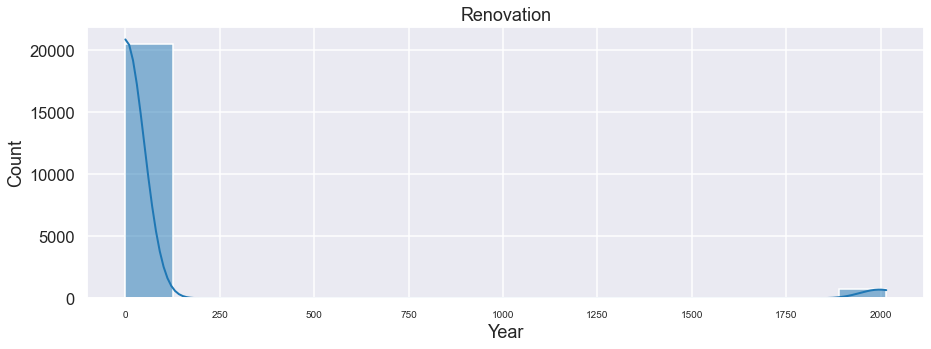

In [4524]:
#plot 'yr_renovated' distribution
plt.figure(figsize = (15, 5))
sns.histplot(kc_house['yr_renovated'], kde = True)

#set labels
plt.title('Renovation')
plt.xlabel('Year')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

#save
plt.savefig('./Data & Figures/yr_renovated_distribution_histplot')

<Figure size 1080x360 with 0 Axes>

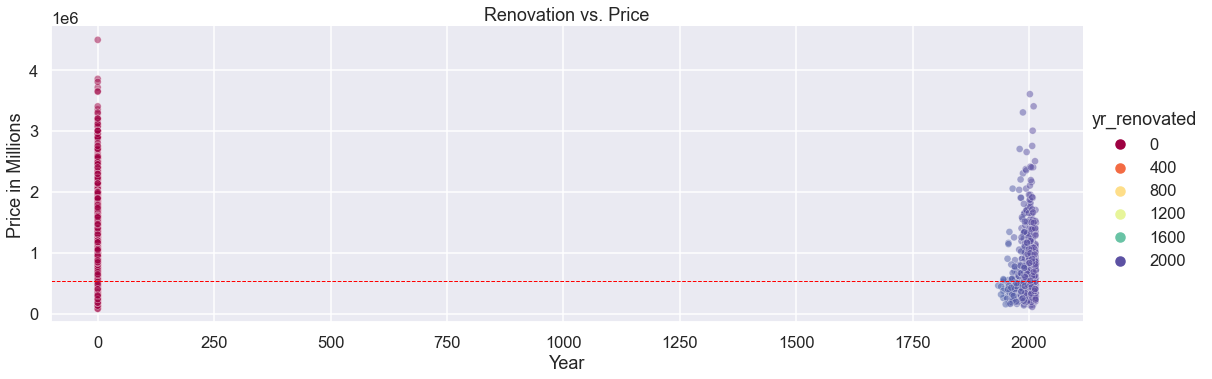

In [4526]:
#plot 'yr_renovated' vs 'price' 
plt.figure(figsize = (15, 5))
sns.relplot(x = 'yr_renovated',
            y = 'price',
            hue = 'yr_renovated',
            data = kc_house,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Renovation vs. Price')
plt.xlabel('Year')
plt.ylabel('Price in Millions')

#show
plt.show()

#save
plt.savefig('./Data & Figures/yr_renovated_vs_price_relplot')

We see that 'yr_renovated' is zero-inflated, meaning there are lots of houses that did not get renovated. We can classify 'yr_renovated' as dichotomous variable: yes renovation (1) and no renovation (0)

In [4528]:
#classify 'yr_renovated' as dichotomous variable
kc_house['renovation'] = kc_house['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

#view
kc_house.head(2)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15937 2014-10-30  268950.0         3       1.00         1320      8100   
20963 2014-07-03  399900.0         2       1.75         1410      1005   

       floors  waterfront  condition  grade  ...  yr_built  yr_renovated  \
15937     1.0         0.0          3      6  ...      1943           0.0   
20963     1.5         0.0          3      9  ...      2011           0.0   

       zipcode      lat     long  sqft_living15  sqft_lot15  basement  age  \
15937    98166  47.4697 -122.351           1000        8100         1   72   
20963    98027  47.5446 -122.018           1440        1188         1    4   

       renovation  
15937           0  
20963           0  

[2 rows x 22 columns]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


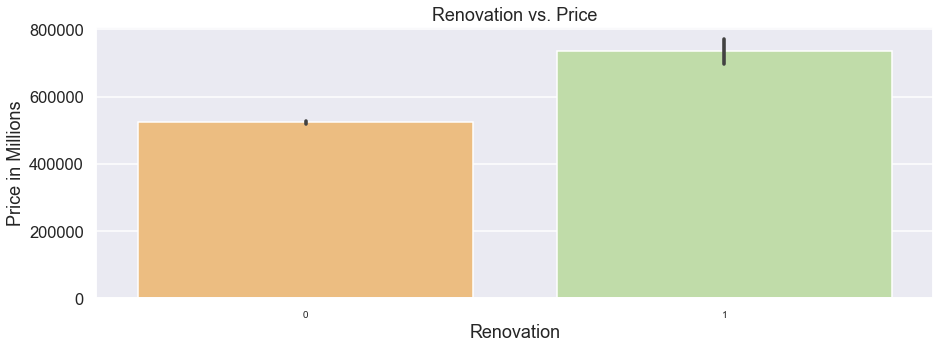

In [4529]:
#plot 'yr_renovated'  vs. 'price' distribution
plt.figure(figsize = (15, 5))
sns.barplot(kc_house['renovation'], kc_house['price'], 
            palette = "Spectral")

#set labels
plt.title('Renovation vs. Price')
plt.xlabel('Renovation')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 10)

#show
plt.show()

#save
plt.savefig('./Data & Figures/yr_renovated_vs_price_barplot')

In [4587]:
#get correlation
kc_house[['renovation', 'yr_renovated', 'price']].corr()

renovation  yr_renovated     price
renovation      1.000000      0.999968  0.115141
yr_renovated    0.999968      1.000000  0.115475
price           0.115141      0.115475  1.000000

## Location Data: 'zipcode'

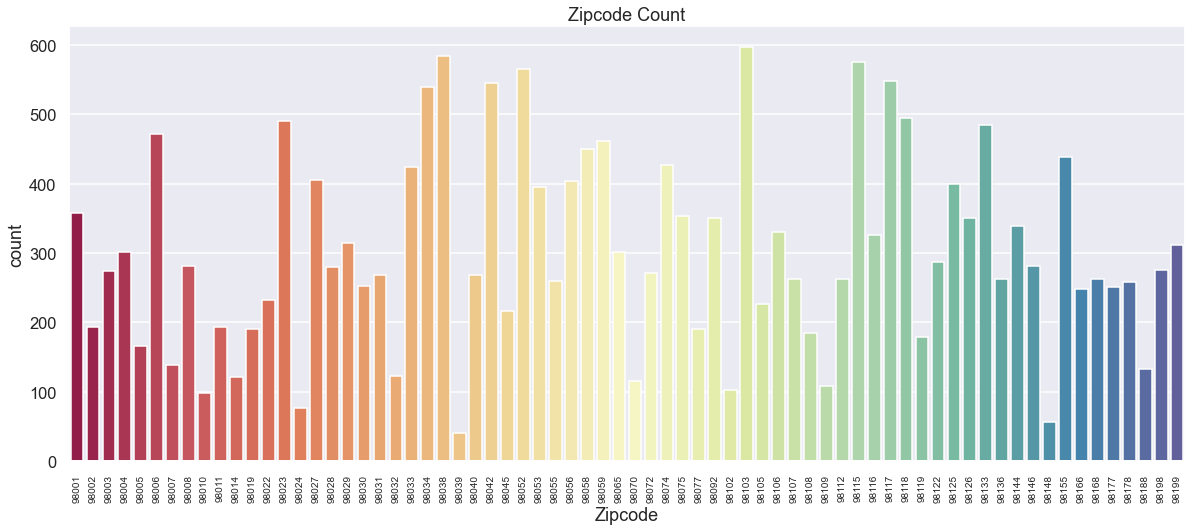

In [4532]:
#plot 'zipcode' vs. 'price'  distribution
plt.figure(figsize = (20, 8))
sns.countplot(x ='zipcode', 
              data = kc_house, 
              palette = "Spectral")

#set labels
plt.title('Zipcode Count')
plt.xlabel('Zipcode')

#set xticks
plt.xticks(fontsize = 10, rotation = 90)

#show
plt.show()

#save
plt.savefig('./Data & Figures/zipcode_countplot')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


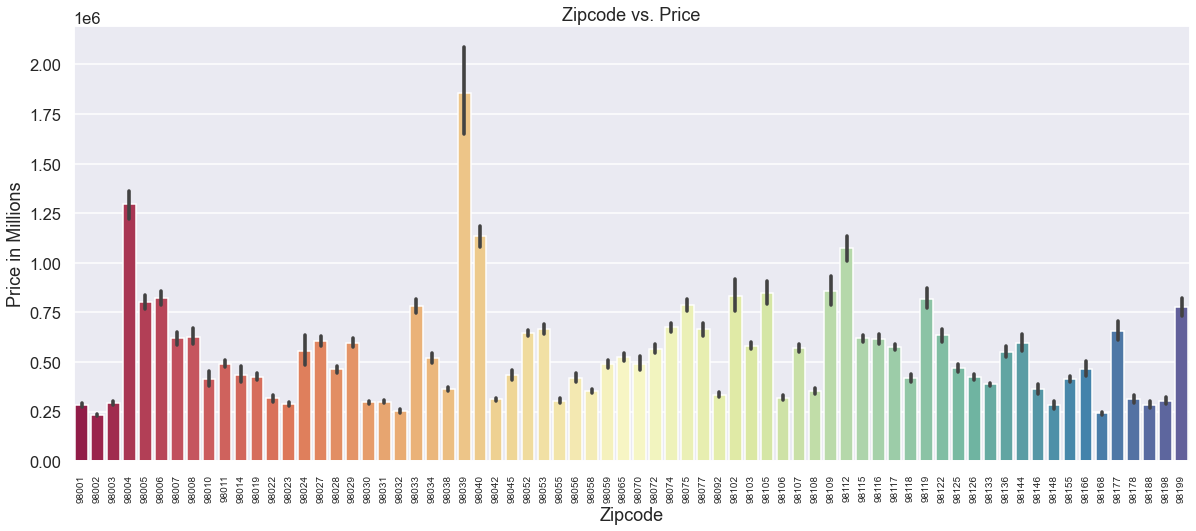

In [4534]:
#plot 'zipcode' vs. 'price'  distribution
plt.figure(figsize = (20, 8))
sns.barplot(kc_house['zipcode'], kc_house['price'],
            palette = "Spectral")

#set labels
plt.title('Zipcode vs. Price')
plt.xlabel('Zipcode')
plt.ylabel('Price in Millions')

#set xticks
plt.xticks(fontsize = 10, rotation = 90)

#show
plt.show()

#save
plt.savefig('./Data & Figures/zipcode_vs_price_barplot')

We observe that zipcode 98004, 98039, 98040, 98112 are those with highest value. We can take a look at these zipcodes later.

<Figure size 1080x360 with 0 Axes>

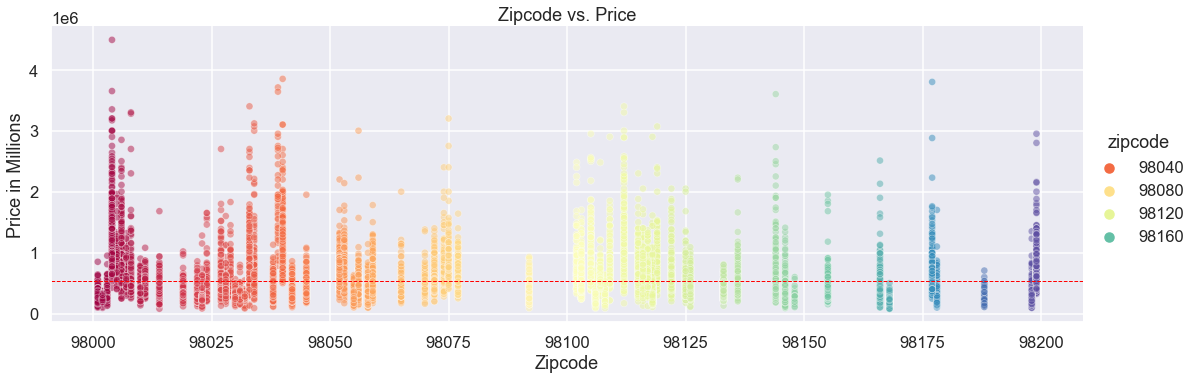

In [4536]:
#plot 'zipcode' vs 'price' 
plt.figure(figsize = (15, 5))
sns.relplot(x = 'zipcode',
            y = 'price',
            hue = 'zipcode',
            data = kc_house,
            alpha = 0.5, s = 50, aspect = 3, palette = 'Spectral')

#draw mean()
plt.axhline(kc_house['price'].mean(),
           ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Zipcode vs. Price')
plt.xlabel('Zipcode')
plt.ylabel('Price in Millions')

#show
plt.show()

#save
plt.savefig('./Data & Figures/zipcode_vs_price_relplot')

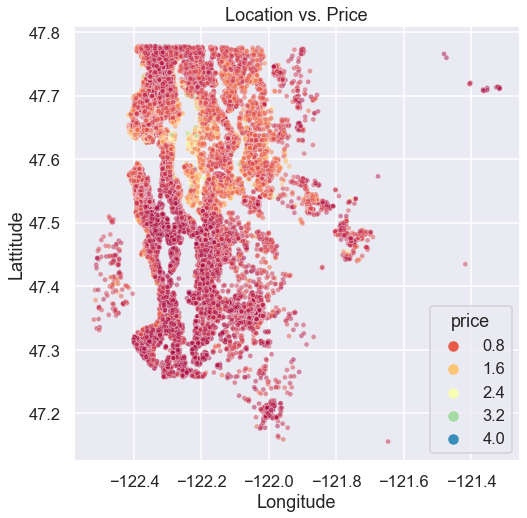

In [4581]:
#plot 'zipcode' vs 'price' 
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'long',
                y = 'lat',
                hue = 'price',
                data = kc_house,
                alpha = 0.5, s = 25, palette = 'Spectral')

#set labels
plt.title('Location vs. Price')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')

#show
plt.show()

#save
plt.savefig('./Data & Figures/location_vs_price_scatterplot')

We see that properties that are 1.6M+ are clustered and increase in price as they go toward the center. We can section our maps into areas as such: Zipcode data is categoried (A-I) as per the zipcode map on the King County website: https://www.kingcounty.gov/services/gis/Maps/vmc/Boundaries.aspx

* A - Seattle, Shoreline, Lake Forest Park

* B - Kirkland, Kenmore, Bothell, Redmond, Woodinville

* C - Bellevue, Mercer Island, Newcastle

* D - Renton, Kent

* E - Burien, Normandy Park, Des Moines, SeaTac, Tukwilla, Vashon Island

* F - Federal Way, Auburn, Algona, Milton, Pacific

* G - Sammamish, Issaquah, Carnation, Duvall

* H - Covington, Maple Valley, Black Diamond, Enumclaw

* I - Snoquaimie, North Bend


In [4541]:
#code adopted from https://github.com/calbal91/project-king-county-housing/blob/master/Analysis.ipynb

# Seattle, Shoreline, Lake Forest Park
Azips = [98177, 98133, 98125, 98155, 98107, 98115, 98105, 98109, 98112,
        98117, 98199, 98122, 98144, 98118, 98108, 98106, 98136, 98126,
        98116, 98102, 98103, 98119, 98134]

# Kirkland, Kenmore, Bothell, Redmond, Woodinville
Bzips = [98053, 98052, 98077, 98072, 98033, 98034, 98011, 98028]

# Bellevue, Medina, Mercer Island, Newcastle
Czips = [98059, 98056, 98006, 98040, 98008, 98007, 98005, 98004, 98039]

# Renton, Kent
Dzips = [98057, 98055, 98058, 98032, 98031, 98030, 98178]

# Burien, Normandy Park, Des Moines, SeaTac, Tukwilla, Vashon Island
Ezips = [98070, 98146, 98168, 98166, 98198, 98148, 98158, 98188]

# Federal Way, Auburn, Algona, Milton, Pacific
Fzips = [98023, 98003, 98063, 98047, 98001, 98002, 98093, 98071, 98002, 98092]

# Sammamish, Issaquah, Carnation, Duvall
Gzips = [98074, 98075, 98029, 98027, 98019, 98014]

# Covington, Maple Valley, Black Diamond, Enumclaw
Hzips = [98022, 98042, 98010, 98038, 98051]

# Snoquaimie, North Bend
Izips = [98065, 98045, 98024]

In [4542]:
def zipcode(x):
    
    '''Parameters:
           x (int): The property's zip code.
       Returns:
           zipcode group (str): The property's area group (a letter from A to I)
           Will return X if zip code not recognised.'''
    
    if x in Azips:
        return 'A'
    elif x in Bzips:
        return 'B'
    elif x in Czips:
        return 'C'
    elif x in Dzips:
        return 'D'
    elif x in Ezips:
        return 'E'
    elif x in Fzips:
        return 'F'
    elif x in Gzips:
        return 'G'
    elif x in Hzips:
        return 'H'
    elif x in Izips:
        return 'I'
    else:
        return 'X'

In [4543]:
#one hot encoding our zipcode
kc_house['zipcat'] = kc_house['zipcode'].map(zipcode)
zip_dummies = pd.get_dummies(kc_house["zipcat"], prefix="zip")

#drop zipcode, latitude, and longitude 
#kc_house.drop(["zipcat","zipcode","lat","long"], axis=1, inplace = True)

#merge with our dataframe
kc_house = pd.concat([kc_house, zip_dummies], axis=1)

#review
kc_house.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15937 2014-10-30  268950.0         3       1.00         1320      8100   
20963 2014-07-03  399900.0         2       1.75         1410      1005   
7614  2014-06-24  339000.0         3       1.00         1100      4128   
3257  2015-03-11  380000.0         2       1.00         1040      7372   
16723 2014-07-25  365000.0         5       2.00         1600      4168   

       floors  waterfront  condition  grade  ...  zipcat  zip_A  zip_B  zip_C  \
15937     1.0         0.0          3      6  ...       E      0      0      0   
20963     1.5         0.0          3      9  ...       G      0      0      0   
7614      1.0         0.0          4      7  ...       A      1      0      0   
3257      1.0         0.0          5      7  ...       A      1      0      0   
16723     1.5         0.0          3      7  ...       A      1      0      0   

       zip_D  zip_E  zip_F  zip_G  zip_H  zip_I  
15937      0      1      0      0      0      0  
20963      0      0      0      1      0      0  
7614       0      0      0      0      0      0  
3257       0      0      0      0      0      0  
16723      0      0      0      0      0      0  

[5 rows x 32 columns]

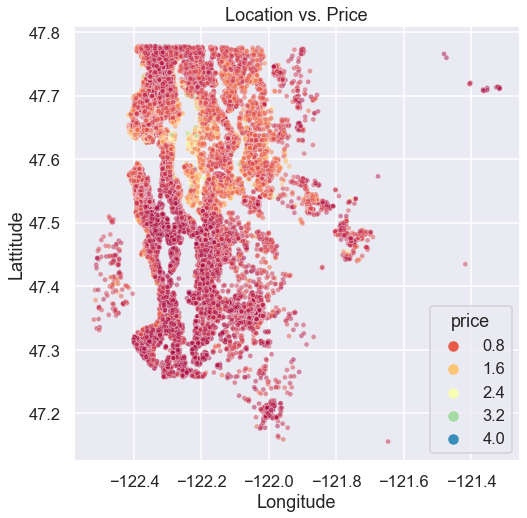

<Figure size 432x288 with 0 Axes>

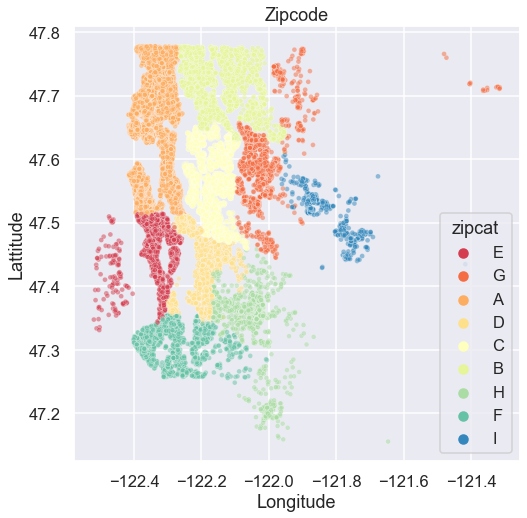

<Figure size 432x288 with 0 Axes>

In [4589]:
#plot 'zipcode' vs 'price' 
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'long',
                y = 'lat',
                hue = 'price',
                data = kc_house,
                alpha = 0.5, s = 25, palette = 'Spectral')
plt.title('Location vs. Price')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data & Figures/location_vs_price_scatterplot')

#plot 'zipcat' 
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'long',
                y = 'lat',
                hue = 'zipcat',
                data = kc_house,
                alpha = 0.5, s = 25, palette = 'Spectral')
plt.title('Zipcode')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data & Figures/zipcat_scatterplot')

Reminder: 
* A - Seattle, Shoreline, Lake Forest Park: 98177, 98133, 98125, 98155, 98107, 98115, 98105, 98109, 98112, 98117, 98199, 98122, 98144, 98118, 98108, 98106, 98136, 98126,98116, 98102, 98103, 98119, 98134

* B - Kirkland, Kenmore, Bothell, Redmond, Woodinville: 98053, 98052, 98077, 98072, 98033, 98034, 98011, 98028

* C - Bellevue, Mercer Island, Newcastle: 98059, 98056, 98006, 98040, 98008, 98007, 98005, 98004, 98039

* D - Renton, Kent: 98057, 98055, 98058, 98032, 98031, 98030, 98178

* E - Burien, Normandy Park, Des Moines, SeaTac, Tukwilla, Vashon Island: 98070, 98146, 98168, 98166, 98198, 98148, 98158, 98188

* F - Federal Way, Auburn, Algona, Milton, Pacific: 98023, 98003, 98063, 98047, 98001, 98002, 98093, 98071, 98002, 98092

* G - Sammamish, Issaquah, Carnation, Duvall: 98074, 98075, 98029, 98027, 98019, 98014

* H - Covington, Maple Valley, Black Diamond, Enumclaw: 98022, 98042, 98010, 98038, 98051

* I - Snoquaimie, North Bend: 98065, 98045, 98024

The yellow region of C which includes Bellevue, Mercer Island, Newcastle is the region with the highest values. 

## Check for Multicollinearity

In [4544]:
kc_house.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.304066   0.489101     0.678127  0.082122  0.258061   
bedrooms       0.304066  1.000000   0.509772     0.590284  0.028353  0.173943   
bathrooms      0.489101  0.509772   1.000000     0.732245  0.072372  0.508723   
sqft_living    0.678127  0.590284   0.732245     1.000000  0.160042  0.351393   
sqft_lot       0.082122  0.028353   0.072372     0.160042  1.000000 -0.010385   
floors         0.258061  0.173943   0.508723     0.351393 -0.010385  1.000000   
waterfront     0.235659 -0.013675   0.040857     0.080659  0.021792  0.017307   
condition      0.045383  0.028139  -0.128018    -0.056250 -0.006941 -0.266176   
grade          0.667937  0.355463   0.652347     0.753837  0.102784  0.456645   
sqft_above     0.579077  0.481461   0.659654     0.867023  0.170490  0.527583   
sqft_basement  0.296746  0.299606   0.257640     0.413684  0.008230 -0.261943   
yr_built       0.041390  0.157034   0.522198     0.320677  0.048393  0.489434   
yr_renovated   0.115475  0.012778   0.039922     0.043353  0.005602  0.000266   
zipcode       -0.044112 -0.160050  -0.207266    -0.201616 -0.128765 -0.057707   
lat            0.329626 -0.017393   0.016761     0.046209 -0.088846  0.047252   
long           0.019103  0.138109   0.230061     0.247063  0.226890  0.124606   
sqft_living15  0.593115  0.400658   0.561372     0.761197  0.140743  0.274806   
sqft_lot15     0.076248  0.026706   0.073331     0.174977  0.710216 -0.016910   
basement       0.178449  0.160377   0.158497     0.199826 -0.037356 -0.262707   
age           -0.041390 -0.157034  -0.522198    -0.320677 -0.048393 -0.489434   
renovation     0.115141  0.012506   0.039456     0.043119  0.005720  0.000185   
zip_A          0.090660 -0.176351  -0.178592    -0.219879 -0.165497  0.026032   
zip_B          0.094442  0.054013   0.097141     0.113830  0.036840  0.005322   
zip_C          0.265014  0.160332   0.116348     0.190107 -0.018937 -0.038889   
zip_D         -0.188503  0.019175  -0.037048    -0.052975 -0.013861 -0.064936   
zip_E         -0.146921 -0.059846  -0.134030    -0.098343  0.020220 -0.127118   
zip_F         -0.211636  0.016424  -0.016228    -0.032735  0.005731 -0.047365   
zip_G          0.086889  0.059919   0.159969     0.159680  0.082135  0.145326   
zip_H         -0.156335  0.003694   0.031954    -0.009051  0.117608  0.036551   
zip_I         -0.018061  0.005745   0.050759     0.052921  0.101217  0.059280   

               waterfront  condition     grade  sqft_above  ...  renovation  \
price            0.235659   0.045383  0.667937    0.579077  ...    0.115141   
bedrooms        -0.013675   0.028139  0.355463    0.481461  ...    0.012506   
bathrooms        0.040857  -0.128018  0.652347    0.659654  ...    0.039456   
sqft_living      0.080659  -0.056250  0.753837    0.867023  ...    0.043119   
sqft_lot         0.021792  -0.006941  0.102784    0.170490  ...    0.005720   
floors           0.017307  -0.266176  0.456645    0.527583  ...    0.000185   
waterfront       1.000000   0.017081  0.068833    0.053975  ...    0.067810   
condition        0.017081   1.000000 -0.148983   -0.160965  ...   -0.057037   
grade            0.068833  -0.148983  1.000000    0.746248  ...    0.010964   
sqft_above       0.053975  -0.160965  0.746248    1.000000  ...    0.013561   
sqft_basement    0.062524   0.181729  0.142556   -0.094960  ...    0.061369   
yr_built        -0.028867  -0.363061  0.447364    0.428934  ...   -0.202422   
yr_renovated     0.067490  -0.057453  0.011335    0.013642  ...    0.999968   
zipcode          0.034600   0.002124 -0.181297   -0.265111  ...    0.062819   
lat             -0.014881  -0.015629  0.111320   -0.009121  ...    0.027386   
long            -0.041180  -0.105535  0.197176    0.353480  ...   -0.063621   
sqft_living15    0.073399  -0.092922  0.706129    0.732621  ...   -0.002333   
sqft_lot15       0.032131  -0.000628  0.111520    0.185109  ...    0.005536   
basem

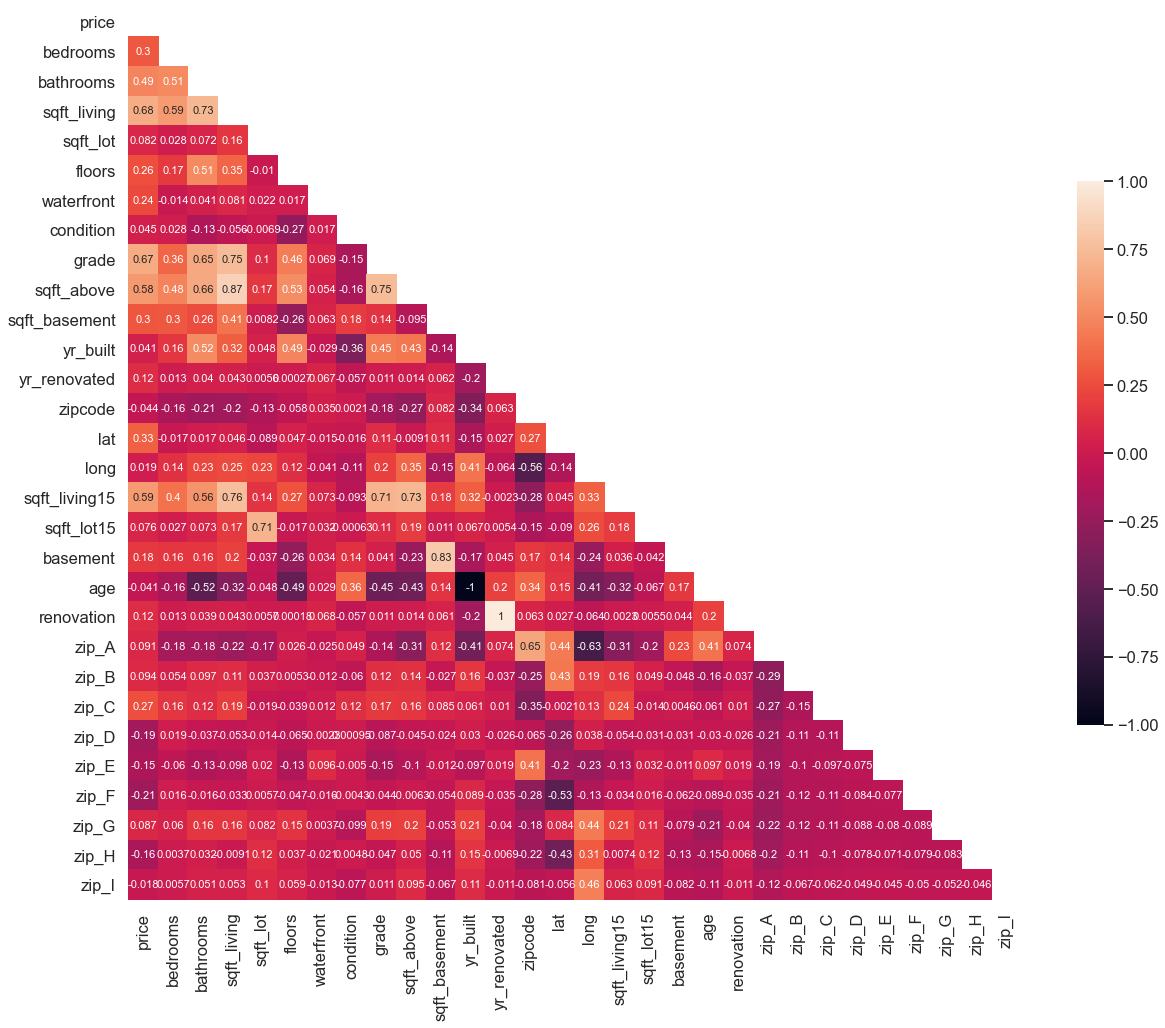

In [4545]:
#heatmap for all the required features
mask = np.zeros_like(kc_house.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize = (20, 20))
    ax = sns.heatmap(kc_house.corr(), 
                     annot = True,
                     annot_kws={"size": 11},
                     ax = ax, 
                     cbar_kws = {"shrink": .5}, 
                     mask = mask, 
                     vmax = 1,
                     vmin = -1,
                     square = True)
    
#save
plt.savefig('./Data & Figures/heatmap')

We see here that 'sqft_lot' (0.089), 'sqft_lot15' (0.082), and 'yr_renovated' (0.12) has very low correlation with 'price'. We want to aim for at least a 0.2 correlation. Hence we will eliminate these features from our model.

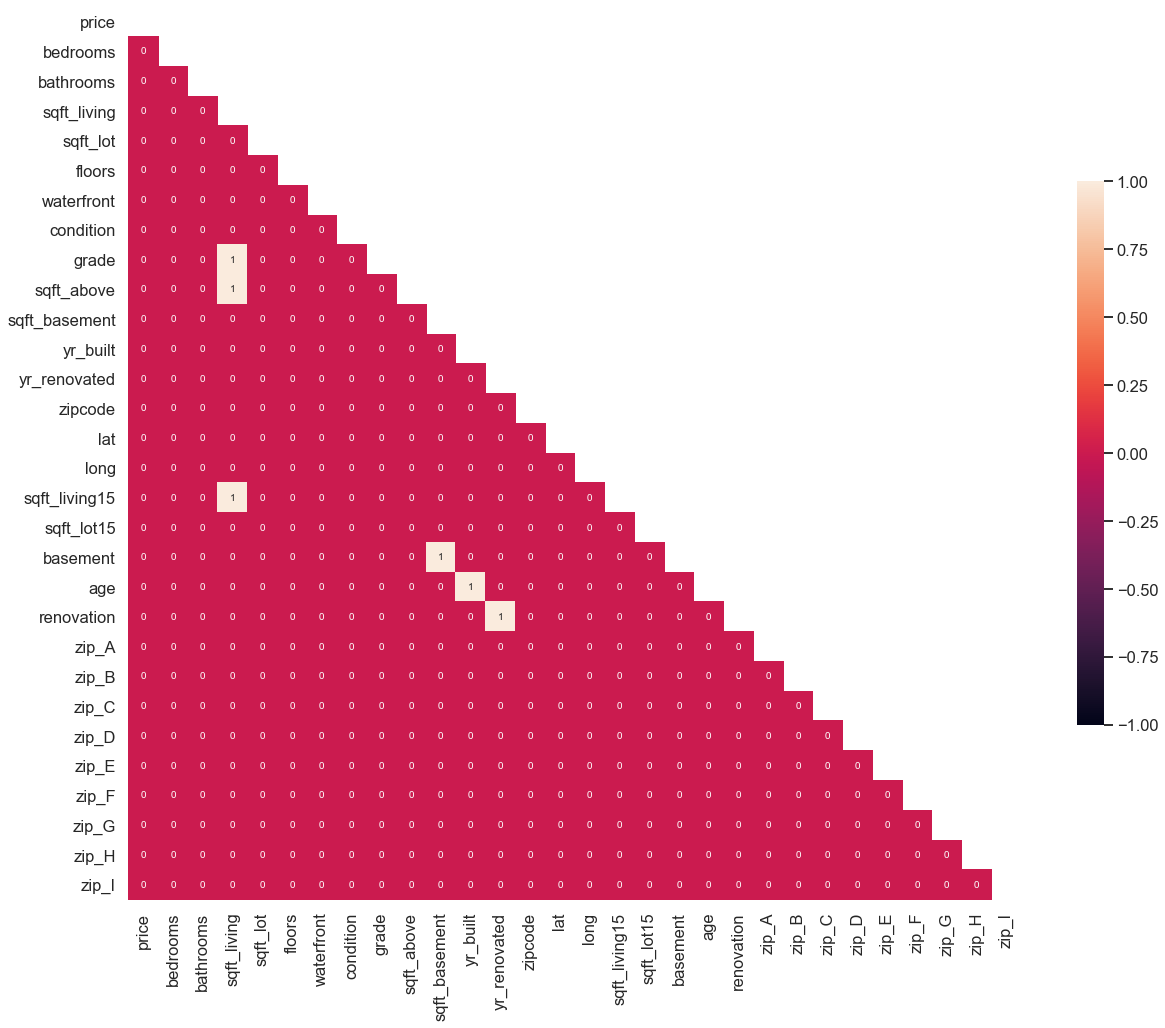

In [4547]:
#check for multicollinearity
mask = np.zeros_like(abs(kc_house.corr()) > 0.75)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize = (20, 20))
    ax = sns.heatmap(abs(kc_house.corr()) > 0.75, 
                     annot = True, 
                     ax = ax, 
                     cbar_kws = {"shrink": .5}, 
                     mask = mask, 
                     vmax = 1,
                     vmin = -1,
                     square = True)

#save
plt.savefig('./Data & Figures/multicollinearity_heatmap')

**Observation:** We see multicollinearity between: 'sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'grade'

We will examine which of these features are to keep and which are to drop to avoid multicollinearity

In [4549]:
#create a more robust solution that will return the variable pairs from the correlation matrix 
#that have correlations over .75, but less than 1 (learn.co)
kc_house_corr = kc_house.corr().abs().stack().reset_index().sort_values(0, ascending = False)
kc_house_corr.head()

level_0      level_1    0
0          price        price  1.0
465         long         long  1.0
93   sqft_living  sqft_living  1.0
124     sqft_lot     sqft_lot  1.0
155       floors       floors  1.0

In [4550]:
kc_house_corr['pairs'] = list(zip(kc_house_corr['level_0'], kc_house_corr['level_1']))
kc_house_corr.head()

level_0      level_1    0                       pairs
0          price        price  1.0              (price, price)
465         long         long  1.0                (long, long)
93   sqft_living  sqft_living  1.0  (sqft_living, sqft_living)
124     sqft_lot     sqft_lot  1.0        (sqft_lot, sqft_lot)
155       floors       floors  1.0            (floors, floors)

In [4551]:
kc_house_corr.set_index(['pairs'], inplace = True)
kc_house_corr.head()

level_0      level_1    0
pairs                                                    
(price, price)                    price        price  1.0
(long, long)                       long         long  1.0
(sqft_living, sqft_living)  sqft_living  sqft_living  1.0
(sqft_lot, sqft_lot)           sqft_lot     sqft_lot  1.0
(floors, floors)                 floors       floors  1.0

In [4552]:
kc_house_corr.drop(columns = ['level_0', 'level_1'], inplace = True)
kc_house_corr.head()

0
pairs                          
(price, price)              1.0
(long, long)                1.0
(sqft_living, sqft_living)  1.0
(sqft_lot, sqft_lot)        1.0
(floors, floors)            1.0

In [4553]:
#add correlation column
kc_house_corr.columns = ['cc']
kc_house_corr.head()

cc
pairs                          
(price, price)              1.0
(long, long)                1.0
(sqft_living, sqft_living)  1.0
(sqft_lot, sqft_lot)        1.0
(floors, floors)            1.0

In [4554]:
kc_house_corr.drop_duplicates(inplace = True)

In [4585]:
#correlations over .75, but less than 1. = multicollinarity
kc_house_corr[(kc_house_corr['cc'] > 0.75) & (kc_house_corr['cc'] < 1)]
kc_house_corr.head(10)

cc
pairs                                 
(price, price)                1.000000
(age, yr_built)               1.000000
(renovation, yr_renovated)    0.999968
(sqft_living, sqft_above)     0.867023
(basement, sqft_basement)     0.826263
(sqft_living15, sqft_living)  0.761197
(grade, sqft_living)          0.753837
(sqft_above, grade)           0.746248
(sqft_above, sqft_living15)   0.732621
(bathrooms, sqft_living)      0.732245

In [4588]:
#compare features' correlation with 'price'
kc_house[['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'grade', 'price']].corr()

sqft_living  sqft_above  sqft_living15  bathrooms     grade  \
sqft_living       1.000000    0.867023       0.761197   0.732245  0.753837   
sqft_above        0.867023    1.000000       0.732621   0.659654  0.746248   
sqft_living15     0.761197    0.732621       1.000000   0.561372  0.706129   
bathrooms         0.732245    0.659654       0.561372   1.000000  0.652347   
grade             0.753837    0.746248       0.706129   0.652347  1.000000   
price             0.678127    0.579077       0.593115   0.489101  0.667937   

                  price  
sqft_living    0.678127  
sqft_above     0.579077  
sqft_living15  0.593115  
bathrooms      0.489101  
grade          0.667937  
price          1.000000

Pairs age/yr_built, renovation/yr_renovated and basement/sqft_basement derivative of each other and we are only going to use one version of them. 

We see that that there are other 5 pairs of highly correlated features and the correct approach is to drop one variable from each pair. 'sqft_living' seems to be the one to be dropped since it appears in all pairs. 

## Features Selection

**Summary:**

*  id:             dropped
*  date:           dropped
*  price:          target variable
*  bedrooms:       continuous 
*  bathrooms:      continuous 
*  sqft_living:    not chosen: multicollinarity  
*  sqft_lot:       not chosen: low correlation with target 
*  floors:         OHE 
*  waterfront:     OHE
*  view:           dropped
*  condition:      OHE
*  grade:          continuous
*  sqft_above:     continuous  
*  sqft_basement:  not chosen: zero-flated
*  yr_built:       not chosen 
*  yr_renovated:   not chosen: zero-flated & low correlation with target 
*  zipcode:        
*  lat:            
*  long:           
*  sqft_living15:   
*  sqft_lot15:     not chosen: low correlation with target 
*  age:            not chosen: low correlation with target 

In [4557]:
features = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade', 
            'sqft_above', 'basement', 'renovation']

continuous = ['sqft_above', 'sqft_living15', ]

ordinals = ['bedrooms', 'bathrooms', 'grade']

categoricals = ['floors', 'waterfront', 'condition']

In [4558]:
kc_cont = kc_house[continuous]
kc_ord = kc_house[ordinals]
kc_cat = kc_house[categoricals]

## Prepare Continuous Data 

### Normalization

In [4559]:
# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

kc_cont_norm = kc_cont.apply(normalize)

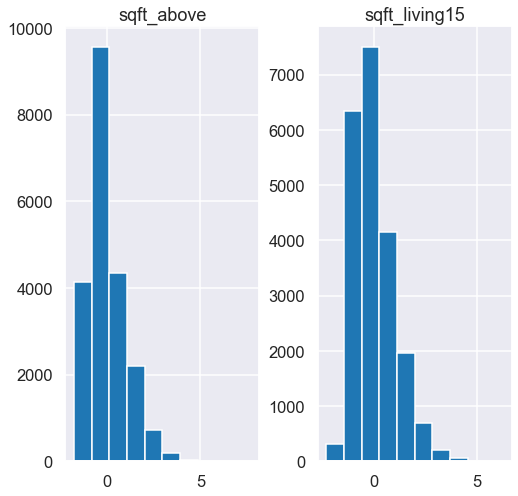

In [4560]:
#plot the new normalized data
kc_cont_norm.hist(figsize = (8, 8));

#save
plt.savefig('./Data & Figures/norm_histplot')

## Prepare Categorical Data with One Hot Encoding

**'floor', 'waterfront', 'condition'** as string since we will use One Hot Encoding on them later

In [4561]:
kc_house.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15937 2014-10-30  268950.0         3       1.00         1320      8100   
20963 2014-07-03  399900.0         2       1.75         1410      1005   
7614  2014-06-24  339000.0         3       1.00         1100      4128   
3257  2015-03-11  380000.0         2       1.00         1040      7372   
16723 2014-07-25  365000.0         5       2.00         1600      4168   

       floors  waterfront  condition  grade  ...  zipcat  zip_A  zip_B  zip_C  \
15937     1.0         0.0          3      6  ...       E      0      0      0   
20963     1.5         0.0          3      9  ...       G      0      0      0   
7614      1.0         0.0          4      7  ...       A      1      0      0   
3257      1.0         0.0          5      7  ...       A      1      0      0   
16723     1.5         0.0          3      7  ...       A      1      0      0   

       zip_D  zip_E  zip_F  zip_G  zip_H  zip_I  
15937      0      1      0      0      0      0  
20963      0      0      0      1      0      0  
7614       0      0      0      0      0      0  
3257       0      0      0      0      0      0  
16723      0      0      0      0      0      0  

[5 rows x 32 columns]

In [4562]:
# Cast to a numeric type then to string type
kc_house['floors'] = kc_house['floors'].astype('str')
kc_house['waterfront'] = kc_house['waterfront'].astype('str')
kc_house['condition'] = kc_house['condition'].astype('float64').astype('str')

print(kc_house['floors'].dtypes)
print(kc_house['waterfront'].dtypes)
print(kc_house['condition'].dtypes)

object
object
object


In [4563]:
#one hot encode categoricals
floors_dummies = pd.get_dummies(kc_house['floors'], prefix = 'floors', drop_first = True)
water_dummies = pd.get_dummies(kc_house['waterfront'], prefix = 'water', drop_first = True)
condition_dummies = pd.get_dummies(kc_house['condition'], prefix = 'cond', drop_first = True)

## Final Dataframe

In [4564]:
#drop columns that were OHE-ed
#kc_house.drop(['floors', 'condition','waterfront'], axis=1, inplace = True)

#drop columns that are not needed
#kc_house.drop(['date', 'sqft_living','sqft_lot', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_lot15', 'age'], axis=1, inplace = True)

In [4565]:
#merge dummies columns
#preprocessed = pd.concat([kc_house, floors_dummies, water_dummies, condition_dummies], axis=1)

In [4566]:
#view
preprocessed.head()

price  bedrooms  bathrooms  grade  sqft_above  sqft_living15  \
15937  268950.0         3       1.00      6         880           1000   
20963  399900.0         2       1.75      9         900           1440   
7614   339000.0         3       1.00      7         720           1510   
3257   380000.0         2       1.00      7         840           1930   
16723  365000.0         5       2.00      7        1600           1190   

       basement  renovation  zip_A  zip_B  ...  floors_1.5  floors_2.0  \
15937         1           0      0      0  ...           0           0   
20963         1           0      0      0  ...           1           0   
7614          1           0      1      0  ...           0           0   
3257          1           0      1      0  ...           0           0   
16723         0           0      1      0  ...           1           0   

       floors_2.5  floors_3.0  floors_3.5  water_1.0  cond_2.0  cond_3.0  \
15937           0           0           0          0         0         1   
20963           0           0           0          0         0         1   
7614            0           0           0          0         0         0   
3257            0           0           0          0         0         0   
16723           0           0           0          0         0         1   

       cond_4.0  cond_5.0  
15937         0         0  
20963         0         0  
7614          1         0  
3257          0         1  
16723         0         0  

[5 rows x 27 columns]

In [4567]:
#save
#preprocessed.to_csv('./Data & Figures/preprocessed.csv')